# MSc Thesis - Hugo Stam

### Example 02 - Offshore Port System - Barges

<img src="Figures/system_layout_alternative_2B.png" style="width:1000px">

##### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
# %matplotlib inline
%matplotlib notebook
import seaborn as sns
sns.set(style="ticks")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# OpenTISim package
from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system_Payra

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets
from IPython.display import HTML

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

# 0. Prepare inputs

In [2]:
# iPython Widgests
life_cycle = widgets.IntSlider(value=25, min=10, max=30, step=5, description='Life cycle:')
annual_demand = widgets.IntSlider(value=1000000, min=500000, max=2000000, step=50000, description='Demand:')
offshore_onshore_distance = widgets.IntSlider(value=60, min=20, max=60, step=20, description='Distance:')

container_ship = widgets.Dropdown(options=[('Post Panamax I (6,000 TEU)', 6000),
                                           ('New-Panamax (12,500 TEU)', 12500),
                                           ('ULCS (21,000 TEU)', 21000)], 
                                  value=6000, description='OGV:')

barge = widgets.Dropdown(options=[('Small (200 TEU)', 200), 
                                  ('Medium (250 TEU)', 250),
                                  ('Large (300 TEU)', 300)], 
                         value=250, description='Barge:')

foreshore_slope = widgets.Dropdown(options=[('Gently (3 km/m)', 3.0), 
                                            ('Average (2 km/m)', 2.0),
                                            ('Steep (1 km/m)', 1.0)], 
                                   value=3.0, description='Slope:')

print('\033[1m*** Input Values \033[0m')
display(annual_demand, offshore_onshore_distance, container_ship, barge, 
        foreshore_slope, life_cycle)

*** Input Values 


IntSlider(value=1000000, description='Demand:', max=2000000, min=500000, step=50000)

IntSlider(value=60, description='Distance:', max=60, min=20, step=20)

Dropdown(description='OGV:', options=(('Post Panamax I (6,000 TEU)', 6000), ('New-Panamax (12,500 TEU)', 12500…

Dropdown(description='Barge:', index=1, options=(('Small (200 TEU)', 200), ('Medium (250 TEU)', 250), ('Large …

Dropdown(description='Slope:', options=(('Gently (3 km/m)', 3.0), ('Average (2 km/m)', 2.0), ('Steep (1 km/m)'…

IntSlider(value=25, description='Life cycle:', max=30, min=10, step=5)

In [3]:
offshore_distance = offshore_onshore_distance.value
demand = annual_demand.value
design_container_ship = container_ship.value
design_barge = barge.value
slope = foreshore_slope.value
slope = 60/16.0
lifecycle = life_cycle.value

print('The offshore distance:', offshore_distance, 'km')
print('The annual demand:', demand, 'TEU')
print('The design container ship capacity:', design_container_ship, 'TEU')
print('The design barge capacity:', design_barge, 'TEU')
print('The slope of the foreshore:', slope, 'in km reach per meter water depth')
print('The design life cycle:', lifecycle, 'years')

avg_parcel = design_container_ship / 8

startyear = 2020

The offshore distance: 60 km
The annual demand: 1000000 TEU
The design container ship capacity: 6000 TEU
The design barge capacity: 250 TEU
The slope of the foreshore: 3.75 in km reach per meter water depth
The design life cycle: 25 years


## 0.1 Generate demand forecast scenario

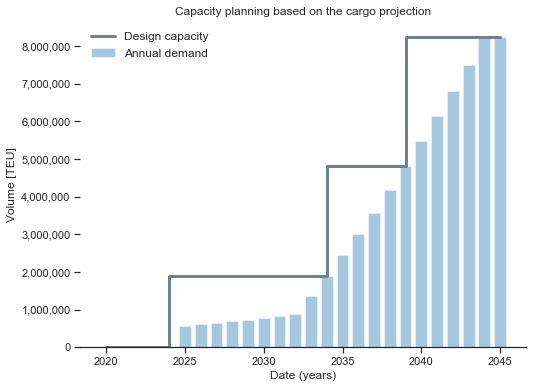

In [49]:
years = list(range(startyear, startyear + lifecycle+1))

scenario_demand_payra = [0,0,0,0,0,
                         573_888, 612_686, 652_443, 693_678, 736_778, 
                         781_466, 826_485, 873_667, 1_360_609, 1_887_942, 
                         2_440_500, 2_996_093, 3_577_293, 4_185_194, 4_821_006, 
                         5_485_980, 6_129_643, 6_800_635, 7_500_052, 8_229_059, 8_229_059] 

scenario_demand = [10,10,10,10,1_900_000,
                   1_900_000, 1_900_000, 1_900_000, 1_900_000, 1_900_000, 
                   1_900_000, 1_900_000, 1_900_000, 1_900_000, 4_825_000, 
                   4_825_000, 4_825_000, 4_825_000, 4_825_000, 8_250_000, 
                   8_250_000, 8_250_000, 8_250_000, 8_250_000, 8_250_000, 8_250_000]

scenario_data={'year': years, 'volume': scenario_demand}
# print(scenario_data)

plt.figure(figsize=(8,6))
plt.bar(years, scenario_demand_payra, color='tab:blue', width = 0.75, alpha=0.4, label="Annual demand", zorder=1)
plt.step(years, scenario_demand, where='post', color='slategray', linewidth=3, label="Design capacity", zorder=2)

if lifecycle == 20:
    plt.xticks([2020, 2025, 2030, 2035, 2040])

plt.yticks([0, 1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6],
           [0, '1,000,000', '2,000,000', '3,000,000', '4,000,000', '5,000,000', '6,000,000', '7,000,000', '8,000,000'])
plt.title('Capacity planning based on the cargo projection', fontsize='large')

plt.xlabel("Date (years)", fontsize='large')
plt.ylabel('Volume [TEU]', fontsize='large')

plt.legend(loc='upper left', fontsize='large', frameon=False)

sns.despine(left=True)

plt.savefig("SaveFigures/Payra/demand_payra.png", bbox_inches = 'tight')

In [5]:
scenario_demand = [10,10,10,10,10,
                   1_900_000, 1_900_000, 1_900_000, 1_900_000, 1_900_000, 
                   1_900_000, 1_900_000, 1_900_000, 1_900_000, 1_900_000, 
                   4_900_000, 4_900_000, 4_900_000, 4_900_000, 4_900_000, 
                   8_250_000, 8_250_000, 8_250_000, 8_250_000, 8_250_000, 8_250_000]

years = years[0:25]
scenario_demand = scenario_demand[0:25]

In [6]:
# instantiate Commodity objects, the inputs for the Commodity class
if design_container_ship == 6000:
    container_defaults.container_data['post_panamax_I_perc'] = 100
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 0

if design_container_ship == 12500:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 100
    container_defaults.container_data['ULCS_perc'] = 0
    
if design_container_ship == 21000:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 100
    
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)
# print(container)
# print(container.scenario_data)

# combine
demand = [container]

## 0.2 Generate vessels

In [7]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

Specify the variables

In [8]:
OffshoreBarge = container_system_Payra.System(
                startyear = startyear,
                lifecycle = lifecycle,
                stack_equipment = 'rtg',
                laden_stack = 'rtg',
                elements = demand + vessels,
                crane_type_defaults = container_defaults.sts_crane_data,
                offshore_distance = offshore_distance,
                onshore_perc=0.75, 
                barge_type = 'medium',
                foreshore_slope = slope,
                bathymetry_factor = 0.80,
                allowable_berth_occupancy = 0.70,
                offshore_dwell_time = 2.0,
                laden_perc=0.80, 
                reefer_perc=0.10,
                empty_perc=0.075, 
                oog_perc=0.025,
                transhipment_ratio = 0.0,
                debug = True)

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, {revenues})
    7. calculate PV's {and aggregate to NPV}

In [9]:
OffshoreBarge.simulate()


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 1
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 1
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 10

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

  >>> Number of OGV berths: 1
     >> The length of the design vessel is 300 m
     >> The length of the quay is 330 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 330 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020      21874398.0                   0.0                 0.0
1  2021      14582932.0                   0.0                 0.0
2  2022             0.0              298323.3            298323.3
3  2023             0.0              298323.3            298323.3
4  2024             0.0              298323.3            298323.3

     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021      11695500.0                   0.0                 0.0   
2  2022             0.0              305100.0            101700.0   
3  2023             0.0              305100.0            101700.0   
4  2024             0.0              305100.0            101700.0   

   Offshore Labour  
0              0.0  
1              0.0  
2         687500.0  
3         687500.0  
4         687500.0

     Berth occupancy planned (after adding Crane): 0.002
     Berth occupancy online  (after adding Crane): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 1
     Horizontal transport online  (@ start of year): 0
     Horizontal transport planned (@ start of year): 0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        114000.0                   0.0              0.0       170500.0   
2  2022             0.0               11300.0         125000.0            0.0   
3  2023             0.0               11300.0         125000.0            0.0   
4  2024             0.0               11300.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              16950.0        187500.0  
3              16950.0        187500.0  
4              16950.0        187500.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        114000.0                   0.0              0.0       170500.0   
2  2022             0.0               11300.0         125000.0            0.0   
3  2023             0.0               11300.0         125000.0            0.0   
4  2024             0.0               11300.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              16950.0        187500.0  
3              16950.0        187500.0  
4              16950.0        187500.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        114000.0                   0.0              0.0       170500.0   
2  2022             0.0               11300.0         125000.0            0.0   
3  2023             0.0               11300.0         125000.0            0.0   
4  2024             0.0               11300.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              16950.0        187500.0  
3              16950.0        187500.0  
4              16950.0        187500.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        114000.0                   0.0              0.0       170500.0   
2  2022             0.0               11300.0         125000.0            0.0   
3  2023             0.0               11300.0         125000.0            0.0   
4  2024             0.0               11300.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              16950.0        187500.0  
3              16950.0        187500.0  
4              16950.0        187500.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        114000.0                   0.0              0.0       170500.0   
2  2022             0.0               11300.0         125000.0            0.0   
3  2023             0.0               11300.0         125000.0            0.0   
4  2024             0.0               11300.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              16950.0        187500.0  
3              16950.0        187500.0  
4              16950.0        187500.0

     Stack Capacity planned  (@ start of year): 0
     Stack Capacity online   (@ start of year): 0
     Stack Capacity required (@ start of year): 0
     Laden and Reefer Ground Slots required (@ start of year): 0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021       2071150.0                   0.0      2897350.0   
2  2022             0.0              165240.0            0.0   
3  2023             0.0              165240.0            0.0   
4  2024             0.0              165240.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2             247860.0  
3             247860.0  
4             247860.0

     Empty Stack capacity planned  (@ start of year): 0
     Empty Stack capacity online   (@ start of year): 0
     Empty Stack capacity required (@ start of year): 0
     Empty Ground Slots required   (@ start of year): 0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021        759400.0                   0.0      1126600.0   
2  2022             0.0               73440.0            0.0   
3  2023             0.0               73440.0            0.0   
4  2024             0.0               73440.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2             110160.0  
3             110160.0  
4             110160.0

     OOG Slots planned  (@ start of year): 0
     OOG Slots online   (@ start of year): 0
     OOG Slots required (@ start of year): 0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021       1705000.0                   0.0      2545000.0   
2  2022             0.0              168000.0            0.0   
3  2023             0.0              168000.0            0.0   
4  2024             0.0              168000.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2             252000.0  
3             252000.0  
4             252000.0

     Total Ground Slots required   (@ start of year):  0
     Total Stack capacity required (@ start of year):  0 TEU
     Total Stack capacity online   (@ start of year):  0 TEU

     Number of stack Equipment online (@ start of year): 0

     Empty handlers planned (@ start of year): 0
  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        505000.0                   0.0              0.0       755000.0   
2  2022             0.0               10000.0         125000.0            0.0   
3  2023             0.0               10000.0         125000.0            0.0   
4  2024             0.0               10000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              15000.0        187500.0  
3              15000.0        187500.0  
4              15000.0        187500.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        505000.0                   0.0              0.0       755000.0   
2  2022             0.0               10000.0         125000.0            0.0   
3  2023             0.0               10000.0         125000.0            0.0   
4  2024             0.0               10000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              15000.0        187500.0  
3              15000.0        187500.0  
4              15000.0        187500.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        505000.0                   0.0              0.0       755000.0   
2  2022             0.0               10000.0         125000.0            0.0   
3  2023             0.0               10000.0         125000.0            0.0   
4  2024             0.0               10000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              15000.0        187500.0  
3              15000.0        187500.0  
4              15000.0        187500.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        505000.0                   0.0              0.0       755000.0   
2  2022             0.0               10000.0         125000.0            0.0   
3  2023             0.0               10000.0         125000.0            0.0   
4  2024             0.0               10000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              15000.0        187500.0  
3              15000.0        187500.0  
4              15000.0        187500.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021        505000.0                   0.0              0.0       755000.0   
2  2022             0.0               10000.0         125000.0            0.0   
3  2023             0.0               10000.0         125000.0            0.0   
4  2024             0.0               10000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2              15000.0        187500.0  
3              15000.0        187500.0  
4              15000.0        187500.0


     Offshore barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): inf

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of offshore barge berths: 1
  >> nr of offshore barge quays:  0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 130 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020       7518600.0                   0.0                 0.0
1  2021       5012400.0                   0.0                 0.0
2  2022             0.0              107185.0            107185.0
3  2023             0.0              107185.0            107185.0
4  2024             0.0              107185.0            107185.0

     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 10.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.0

  >> nr of offshore barge cranes: 0
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021       7797000.0                   0.0                 0.0   
2  2022             0.0              135600.0             67800.0   
3  2023             0.0              135600.0             67800.0   
4  2024             0.0              135600.0             67800.0   

   Offshore Labour  
0              0.0  
1              0.0  
2         187500.0  
3         187500.0  
4         187500.0

  >> nr of offshore barge cranes: 1
     Offshore barge berth capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021       7797000.0                   0.0                 0.0   
2  2022             0.0              135600.0             67800.0   
3  2023             0.0              135600.0             67800.0   
4  2024             0.0              135600.0             67800.0   

   Offshore Labour  
0              0.0  
1              0.0  
2         187500.0  
3         187500.0  
4         187500.0

  >> nr of offshore barge cranes: 2
     Offshore barge berth capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 5.6 ha
>>> Total onshore land use 2.4 ha
length 300
draught 13.0
beam 40.0
  *** add Access Channel to elements
channel_width 392 m
channel_depth 15 m
channel_length 0 m
channel_volume 0 m3
turning_circle_diameter 540 m3
turning_circle_volume 0 m3
berth_pocket_width 80 m
berth_pocket_volume 0 m3
dredging_volume 0 m3

channel_length_max 58,125 m
excavation_depth 0 m


Year
0  2020
1  2021
2  2022
3  2023
4  2024


>>> Total offshore land use 5.6 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 55767.0 ha

  *** add Reclamation to elements
     >> draught vessel 13.0 m
     >> natural depth 16.0 m
     >> water depth 17.5 m

     >> reclamation area 56,000 m2
     >> reclamation volume 976,000 m3

     >> reclamation area required 55767.2
     >> reclamation volume required 976,000 m3


Year  Reclamation  Coastal Structures Maintenance
0  2020   38323283.0                            0.00
1  2021          0.0                       261242.08
2  2022          0.0                       261242.08
3  2023          0.0                       261242.08
4  2024          0.0                       261242.08


>>> Total offshore land use 5.6 ha

>>> Total offshore land use 5.6 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 236.0 ha

  *** add Revetment to elements

     >> revetment_length 240 m


Year  Coastal Protection  Coastal Structures Maintenance
0  2020          42507143.0                             0.0
1  2021                 0.0                        425071.0
2  2022                 0.0                        425071.0
3  2023                 0.0                        425071.0
4  2024                 0.0                        425071.0


>>> Total offshore land use 5.6 ha

     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 10.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 0
nr barges required: 1
     Barge Capacity planned  (@ start of year): 0
     Barge Capacity online   (@ start of year): 0
     Barge Capacity required (@ start of year): 8

  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0          0.000000                0.0           0.0
1  2021    4000000.0          0.000000                0.0           0.0
2  2022          0.0     380795.267272           200000.0      225000.0
3  2023          0.0     380795.267272           200000.0      225000.0
4  2024          0.0     380795.267272           200000.0      225000.0


     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 10.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 1
nr barges required: 1
  *** add Barge Channel to elements

Calibration Barge Channel
barge_channel_width 127 m
barge_channel_depth 7 m
barge_channel_length 26,250 m
barge_channel_volume 11,704,870 m3
barge_turning_circle_diameter 180 m
barge_turning_circle_volume 178,128 m3
barge_berth_pocket_width 26 m
barge_berth_pocket_volu

Year  Capital Dredging  Maintenance Dredging
0  2020        75885158.0          0.000000e+00
1  2021        75885158.0          0.000000e+00
2  2022               0.0          5.463731e+06
3  2023               0.0          5.463731e+06
4  2024               0.0          5.463731e+06


     Onshore barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): inf [-]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of onshore barge berths: 1
  >> nr of onshore barge quays: 0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 130 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020      4804044.0                  0.0                0.0
1  2021      3202696.0                  0.0                0.0
2  2022            0.0              61942.4            61942.4
3  2023            0.0              61942.4            61942.4
4  2024            0.0              61942.4            61942.4

     Onshore barge berth capacity planned     (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 8.25 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.0 [-]

  >> nr of onshore barge cranes: 0
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021      7797000.0                  0.0                0.0             0.0
2  2022            0.0             135600.0            67800.0        187500.0
3  2023            0.0             135600.0            67800.0        187500.0
4  2024            0.0             135600.0            67800.0        187500.0

  >> nr of onshore barge cranes: 1
     Onshore barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021      7797000.0                  0.0                0.0             0.0
2  2022            0.0             135600.0            67800.0        187500.0
3  2023            0.0             135600.0            67800.0        187500.0
4  2024            0.0             135600.0            67800.0        187500.0

  >> nr of onshore barge cranes: 2
     Onshore barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 0
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of year): 0
     Hinterland Gate service rate planned (@ start of year): inf

  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021       107187.0                  0.0             0.0
2  2022            0.0                600.0        250000.0
3  2023            0.0                600.0        250000.0
4  2024            0.0                600.0        250000.0

     >> nr of hinterland lanes: 1

     Hinterland barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): inf [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 1
  >> nr of hinterland barge quays: 0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 130 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020      4804044.0                  0.0                0.0
1  2021      3202696.0                  0.0                0.0
2  2022            0.0              61942.4            61942.4
3  2023            0.0              61942.4            61942.4
4  2024            0.0              61942.4            61942.4

     Hinterland barge berth capacity planned     (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2.75 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.0 [-]

  >> nr of hinterland barge cranes: 0
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021      7797000.0                  0.0                0.0             0.0
2  2022            0.0             135600.0            67800.0        187500.0
3  2023            0.0             135600.0            67800.0        187500.0
4  2024            0.0             135600.0            67800.0        187500.0

  >> nr of onshore barge cranes: 1
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021      7797000.0                  0.0                0.0             0.0
2  2022            0.0             135600.0            67800.0        187500.0
3  2023            0.0             135600.0            67800.0        187500.0
4  2024            0.0             135600.0            67800.0        187500.0

  >> nr of onshore barge cranes: 2
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 1
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 1
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 10

  Start analysis:
     Berth occupancy planned (@ start of year): 0.002
     Berth occupancy online  (@ start of year): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 1
     Horizontal transport online  (@ start of year): 0
     Horizontal transport planned (@ start of year): 5

     Stack Capacity planned  (@ start of year): 900
     Stack Capacity online   (@ start of 

Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021       1405000.0                   0.0              0.0      2107500.0   
2  2022             0.0              700000.0         125000.0            0.0   
3  2023             0.0              700000.0         125000.0            0.0   
4  2024             0.0              700000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2            1050000.0        187500.0  
3            1050000.0        187500.0  
4            1050000.0        187500.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021       1405000.0                   0.0              0.0      2107500.0   
2  2022             0.0              700000.0         125000.0            0.0   
3  2023             0.0              700000.0         125000.0            0.0   
4  2024             0.0              700000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2            1050000.0        187500.0  
3            1050000.0        187500.0  
4            1050000.0        187500.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021       1405000.0                   0.0              0.0      2107500.0   
2  2022             0.0              700000.0         125000.0            0.0   
3  2023             0.0              700000.0         125000.0            0.0   
4  2024             0.0              700000.0         125000.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2            1050000.0        187500.0  
3            1050000.0        187500.0  
4            1050000.0        187500.0

     Empty handlers planned (@ start of year): 5

     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 10.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 5.6 ha
>>> Total onshore land use 3.8 ha
  *** add General Services to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                  0.00   0.000000e+00   
1  2021      33458418.0                  0.00   3.341322e+07   
2  2022             0.0             501876.27   0.000000e+00   
3  2023             0.0             501876.27   0.000000e+00   
4  2024             0.0             501876.27   0.000000e+00   

   Onshore Maintenance  
0             0.000000  
1             0.000000  
2        501198.358125  
3        501198.358125  
4        501198.358125

length 300
draught 13.0
beam 40.0

>>> Total offshore land use 6.3 ha
     Reclamation area planned  (@ start of year): 55767.0 ha
     Reclamation area online   (@ start of year): 55767.0 ha
     Reclamation area required (@ start of year): 63367.0 ha

  *** add Reclamation to elements
     >> draught vessel 13.0 m
     >> natural depth 16.0 m
     >> water depth 17.5 m

     >> reclamation area 8,000 m2
     >> reclamation volume 133,000 m3

     >> reclamation area required 63367.2
     >> reclamation volume required 1,109,000 m3


Year  Reclamation  Coastal Structures Maintenance
0  2020          0.0                             0.0
1  2021          0.0                             0.0
2  2022   21043300.0                             0.0
3  2023          0.0                        193808.0
4  2024          0.0                        193808.0


>>> Total offshore land use 6.3 ha

>>> Total offshore land use 6.3 ha
     Reclamation area planned  (@ start of year): 236.0 ha
     Reclamation area online   (@ start of year): 236.0 ha
     Reclamation area required (@ start of year): 252.0 ha

  *** add Revetment to elements

     >> revetment_length 20 m


Year  Coastal Protection  Coastal Structures Maintenance
0  2020                 0.0                             0.0
1  2021                 0.0                             0.0
2  2022           2803972.0                             0.0
3  2023                 0.0                         28039.0
4  2024                 0.0                         28039.0


>>> Total offshore land use 6.3 ha

     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 10.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 1
nr barges required: 1
     Barge Capacity planned  (@ start of year): 56852
     Barge Capacity online   (@ start of year): 56852
     Barge Capacity required (@ start of year): 8


     Onshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Onshore barge b

  Total vessel calls: 2534
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 2534
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1900000

  Start analysis:
     Berth occupancy planned (@ start of year): 6.086
     Berth occupancy online  (@ start of year): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 3.336
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 2.42
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 2.126
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 2
     >> The length of the design vessel is 300 m
     >> The length of the quay is 708 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 378 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 2.126
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.668
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.393
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.21
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.112
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 3
     >> The length of the design vessel is 300 m
     >> The length of the quay is 1,054 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 1.112
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.981
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.883
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.806
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.758
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 4
     >> The length of the design vessel is 300 m
     >> The length of the quay is 1,401 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.758
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.697
     Berth occupancy online  (after adding Crane): 1

     STS cranes online            (@ start of year): 1
     STS cranes planned           (@ start of year): 10
     Horizontal transport online  (@ start of year): 5
     Horizontal transport planned (@ start of year): 5

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Stack Capacity planned  (@ start of year): 900
     Stack Capacity online   (@ start of year): 900
     Stack Capacity required (@ start of year): 16356
     Laden and Reefer Ground Slots required (@ start of year): 3271

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     Empty Stack capacity planned  (@ start of year): 480
     Empty Stack capacity online   (@ start of year): 480
     Empty Stack capacity required (@ start of year): 1357
     Empty Ground Slots required   (@ start of year): 226

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     OOG Slots planned  (@ start of year): 100
     OOG Slots online   (@ start of year): 100
     OOG Slots required (@ start of year): 227

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     Total Ground Slots required   (@ start of year):  3,497
     Total Stack capacity required (@ start of year):  17,900 TEU
     Total Stack capacity online   (@ start of year):  1,500 TEU

     Number of stack Equipment online (@ start of year): 3

     Empty handlers planned (@ start of year): 5
  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0


     Offshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 18.232

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 2
  >> nr of offshore barge quays:  1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 138 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 229270.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 9.116

  >> nr of offshore barge cranes: 2
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 3
     Offshore barge berth capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 3
  >> nr of offshore barge quays:  2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 343900.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 6.077

  >> nr of offshore barge cranes: 3
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 4
     Offshore barge berth capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 4
  >> nr of offshore barge quays:  3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 458540.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 4.558

  >> nr of offshore barge cranes: 4
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 5
     Offshore barge berth capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 6
     Offshore barge berth capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 5
  >> nr of offshore barge quays:  4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 573170.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 3.646

  >> nr of offshore barge cranes: 6
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 7
     Offshore barge berth capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 6
  >> nr of offshore barge quays:  5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 687800.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 3.039

  >> nr of offshore barge cranes: 7
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 8
     Offshore barge berth capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 7
  >> nr of offshore barge quays:  6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 802440.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.605

  >> nr of offshore barge cranes: 8
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 9
     Offshore barge berth capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 10
     Offshore barge berth capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 917070.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 8
  >> nr of offshore barge quays:  7
     >> The length of the quay is 1,027 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 917070.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.279

  >> nr of offshore barge cranes: 10
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 11
     Offshore barge berth capacity planned (after adding Crane): 917070.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1031700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 9
  >> nr of offshore barge quays:  8
     >> The length of the quay is 1,153 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1031700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.026

  >> nr of offshore barge cranes: 11
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 12
     Offshore barge berth capacity planned (after adding Crane): 1031700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1146340.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 10
  >> nr of offshore barge quays:  9
     >> The length of the quay is 1,280 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1146340.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.823

  >> nr of offshore barge cranes: 12
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 13
     Offshore barge berth capacity planned (after adding Crane): 1146340.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 11
  >> nr of offshore barge quays:  10
     >> The length of the quay is 1,406 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.657

  >> nr of offshore barge cranes: 13
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 14
     Offshore barge berth capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 15
     Offshore barge berth capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 12
  >> nr of offshore barge quays:  11
     >> The length of the quay is 1,533 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.519

  >> nr of offshore barge cranes: 15
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 16
     Offshore barge berth capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1490240.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 13
  >> nr of offshore barge quays:  12
     >> The length of the quay is 1,659 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1490240.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.402

  >> nr of offshore barge cranes: 16
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 17
     Offshore barge berth capacity planned (after adding Crane): 1490240.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 14
  >> nr of offshore barge quays:  13
     >> The length of the quay is 1,786 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.302

  >> nr of offshore barge cranes: 17
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 18
     Offshore barge berth capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 19
     Offshore barge berth capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1719510.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 15
  >> nr of offshore barge quays:  14
     >> The length of the quay is 1,912 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1719510.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.215

  >> nr of offshore barge cranes: 19
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 20
     Offshore barge berth capacity planned (after adding Crane): 1719510.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1834140.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 16
  >> nr of offshore barge quays:  15
     >> The length of the quay is 2,039 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1834140.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.139

  >> nr of offshore barge cranes: 20
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 21
     Offshore barge berth capacity planned (after adding Crane): 1834140.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 17
  >> nr of offshore barge quays:  16
     >> The length of the quay is 2,165 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.072

  >> nr of offshore barge cranes: 21
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 22
     Offshore barge berth capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 23
     Offshore barge berth capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 18
  >> nr of offshore barge quays:  17
     >> The length of the quay is 2,292 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.013

  >> nr of offshore barge cranes: 23
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 24
     Offshore barge berth capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of offshore barge berths: 19
  >> nr of offshore barge quays:  18
     >> The length of the quay is 2,418 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96

  >> nr of offshore barge cranes: 24
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 25
     Offshore barge berth capacity planned (after adding Crane): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 114630.0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 42.3 ha
>>> Total onshore land use 25.4 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 42.3 ha
     Reclamation area planned  (@ start of year): 63367.0 ha
     Reclamation area online   (@ start of year): 63367.0 ha
     Reclamation area required (@ start of year): 423180.0 ha

  *** add Reclamation to elements
     >> draught vessel 13.0 m
     >> natural depth 16.0 m
     >> water depth 17.5 m

     >> reclamation area 360,000 m2
     >> reclamation volume 6,297,000 m3

     >> reclamation area required 423180.2
     >> reclamation volume required 7,406,000 m3


Year  Reclamation  Coastal Structures Maintenance
0  2020          0.0                             0.0
1  2021          0.0                             0.0
2  2022          0.0                             0.0
3  2023          0.0                             0.0
4  2024          0.0                             0.0


>>> Total offshore land use 42.3 ha

>>> Total offshore land use 42.3 ha
     Reclamation area planned  (@ start of year): 252.0 ha
     Reclamation area online   (@ start of year): 252.0 ha
     Reclamation area required (@ start of year): 651.0 ha

  *** add Revetment to elements

     >> revetment_length 400 m


Year  Coastal Protection  Coastal Structures Maintenance
0  2020                 0.0                             0.0
1  2021                 0.0                             0.0
2  2022                 0.0                             0.0
3  2023                 0.0                             0.0
4  2024                 0.0                             0.0


>>> Total offshore land use 42.3 ha

     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 1
nr barges required: 26
     Barge Capacity planned  (@ start of year): 56852
     Barge Capacity online   (@ start of year): 56852
     Barge Capacity required (@ start of year): 1425000

  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 2
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 3
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 4
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 5
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 6
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 7
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 8
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 9
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 10
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 11
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 12
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 13
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 14
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 15
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 16
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 17
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 18
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 19
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 20
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 21
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 22
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 23
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 24
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 25
nr barges required: 26
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 26
nr barges required: 26

     Onshore barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate p

Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 229267.584 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 6.837 [-]

  >> nr of onshore barge cranes: 2
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 3
     Onshore barge crane capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 3
  >> nr of onshore barge quays: 2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 343901.376 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 4.558 [-]

  >> nr of onshore barge cranes: 3
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 4
     Onshore barge crane capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 4
  >> nr of onshore barge quays: 3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 458535.168 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 3.418 [-]

  >> nr of onshore barge cranes: 4
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 5
     Onshore barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 6
     Onshore barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 5
  >> nr of onshore barge quays: 4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 573168.96 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.735 [-]

  >> nr of onshore barge cranes: 6
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 7
     Onshore barge crane capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 6
  >> nr of onshore barge quays: 5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.279 [-]

  >> nr of onshore barge cranes: 7
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 8
     Onshore barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 7
  >> nr of onshore barge quays: 6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 802436.544 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.953 [-]

  >> nr of onshore barge cranes: 8
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 9
     Onshore barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 10
     Onshore barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 917070.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 8
  >> nr of onshore barge quays: 7
     >> The length of the quay is 1,027 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 917070.336 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.709 [-]

  >> nr of onshore barge cranes: 10
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 11
     Onshore barge crane capacity planned (after adding Crane): 917070.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1031700.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 9
  >> nr of onshore barge quays: 8
     >> The length of the quay is 1,153 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1031704.128 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.519 [-]

  >> nr of onshore barge cranes: 11
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 12
     Onshore barge crane capacity planned (after adding Crane): 1031700.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1146340.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 10
  >> nr of onshore barge quays: 9
     >> The length of the quay is 1,280 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1146337.92 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.367 [-]

  >> nr of onshore barge cranes: 12
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 13
     Onshore barge crane capacity planned (after adding Crane): 1146340.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1260970.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 11
  >> nr of onshore barge quays: 10
     >> The length of the quay is 1,406 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1260971.712 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.243 [-]

  >> nr of onshore barge cranes: 13
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 14
     Onshore barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 15
     Onshore barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 12
  >> nr of onshore barge quays: 11
     >> The length of the quay is 1,533 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1375605.504 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.139 [-]

  >> nr of onshore barge cranes: 15
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 16
     Onshore barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1490240.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 13
  >> nr of onshore barge quays: 12
     >> The length of the quay is 1,659 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1490239.296 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.052 [-]

  >> nr of onshore barge cranes: 16
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 17
     Onshore barge crane capacity planned (after adding Crane): 1490240.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1604870.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of onshore barge berths: 14
  >> nr of onshore barge quays: 13
     >> The length of the quay is 1,786 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 1567500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.977 [-]

  >> nr of onshore barge cranes: 17
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 18
     Onshore barge crane capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 19
     Onshore barge crane capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 60
     Hinterland Gate capacity online      (@ start of year): 60
     Hinterland Gate capacity required    (@ start of year): 501
     Hinterland Gate service rate planned (@ start of year): 8.348

  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 2
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 3
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 4
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 5
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 6
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 7
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 8
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 9

     Hinterland barge berth capacity planned     (@ start of year): 114630.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 522500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 4.558 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of hinterland barge berths: 2
  >> nr of hinterland barge quays: 1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 138 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 229267.584 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 522500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.279 [-]

  >> nr of hinterland barge cranes: 2
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 3
     Hinterland barge crane capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of hinterland barge berths: 3
  >> nr of hinterland barge quays: 2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 343901.376 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 522500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.519 [-]

  >> nr of hinterland barge cranes: 3
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 4
     Hinterland barge crane capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of hinterland barge berths: 4
  >> nr of hinterland barge quays: 3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 458535.168 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 522500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.139 [-]

  >> nr of hinterland barge cranes: 4
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 5
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 6
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 114630.0 [TEU/yr]

  >> nr of hinterland barge berths: 5
  >> nr of hinterland barge quays: 4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 522500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.912 [-]

  >> nr of hinterland barge cranes: 6
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 7
     Hinterland barge crane capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 114630.0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2026.

Simulate year: 2026
  Total vessel calls: 2534
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 2534
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1900000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.697
     Berth occupancy online  (@ start of year): 1

     STS cranes online            (@ start of year): 3
     STS cranes planned           (@ start of year): 10
     Horizontal transport online  (@ start of year): 5
     Horizontal transport planned (@ start of year): 50

     Stack Capacity planned  (@ start of year): 17100
     Stack Capacity o

Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Empty handlers planned (@ start of year): 50

     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 114630.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 42.3 ha
>>> Total onshore land use 36.5 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 42.3 ha
     Reclamation area planned  (@ start of year): 423180.0 ha
     Reclamation area online   (@ start of year): 423180.0 ha
     Reclamation area required (@ start of year): 423180.0 ha


>>> Total offshore land use 42.3 ha
     Reclamation area planned  (@ start of year): 651.0 ha
     Reclamation area online   (@ start of year): 65

Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Empty handlers planned (@ start of year): 50

     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 42.3 ha
>>> Total onshore land use 36.5 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 42.3 ha
     Reclamation area planned  (@ start of year): 423180.0 ha
     Reclamation area online   (@ start of year): 423180.0 ha
     Reclamation area required (@ start of year): 423180.0 ha


>>> Total offshore land use 42.3 ha
     Reclamation area planned  (@ start of year): 651.0 ha
     Reclamation area online   (@ start of year): 6

     OOG Slots planned  (@ start of year): 300
     OOG Slots online   (@ start of year): 300
     OOG Slots required (@ start of year): 227

     Total Ground Slots required   (@ start of year):  3,497
     Total Stack capacity required (@ start of year):  17,900 TEU
     Total Stack capacity online   (@ start of year):  18,800 TEU

     Number of stack Equipment online (@ start of year): 30

     Empty handlers planned (@ start of year): 50

     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.96


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 42.3 ha
>>> Total onshore land use 36.5 ha
length 3


     Empty Stack capacity planned  (@ start of year): 1440
     Empty Stack capacity online   (@ start of year): 1440
     Empty Stack capacity required (@ start of year): 1357
     Empty Ground Slots required   (@ start of year): 226

     OOG Slots planned  (@ start of year): 300
     OOG Slots online   (@ start of year): 300
     OOG Slots required (@ start of year): 227

     Total Ground Slots required   (@ start of year):  3,497
     Total Stack capacity required (@ start of year):  17,900 TEU
     Total Stack capacity online   (@ start of year):  18,800 TEU

     Number of stack Equipment online (@ start of year): 30

     Empty handlers planned (@ start of year): 50

     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 2090000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of y

  Start analysis:
     Berth occupancy planned (@ start of year): 1.796
     Berth occupancy online  (@ start of year): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.667
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.56
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.484
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 5
     >> The length of the design vessel is 300 m
     >> The length of the quay is 1,747 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 1.484
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.393
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.315
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.248
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.197
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 6
     >> The length of the design vessel is 300 m
     >> The length of the quay is 2,094 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 1.197
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.138
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.086
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.04
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.004
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 7
     >> The length of the design vessel is 300 m
     >> The length of the quay is 2,440 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 1.004
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.962
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.925
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.891
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.864
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 8
     >> The length of the design vessel is 300 m
     >> The length of the quay is 2,787 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.864
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.834
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.806
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.78
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.759
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 9
     >> The length of the design vessel is 300 m
     >> The length of the quay is 3,133 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.759
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.735
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.713
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.693
     Berth occupancy online  (after adding Crane): 1

     STS cranes online            (@ start of year): 10
     STS cranes planned           (@ start of year): 27
     Horizontal transport online  (@ start of year): 50
     Horizontal transport planned (@ start of year): 50

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Stack Capacity planned  (@ start of year): 17100
     Stack Capacity online   (@ start of year): 17100
     Stack Capacity required (@ start of year): 42181
     Laden and Reefer Ground Slots required (@ start of year): 8436

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     Empty Stack capacity planned  (@ start of year): 1440
     Empty Stack capacity online   (@ start of year): 1440
     Empty Stack capacity required (@ start of year): 3500
     Empty Ground Slots required   (@ start of year): 583

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     OOG Slots planned  (@ start of year): 300
     OOG Slots online   (@ start of year): 300
     OOG Slots required (@ start of year): 585

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     Total Ground Slots required   (@ start of year):  9,020
     Total Stack capacity required (@ start of year):  46,300 TEU
     Total Stack capacity online   (@ start of year):  18,800 TEU

     Number of stack Equipment online (@ start of year): 30

     Empty handlers planned (@ start of year): 50
  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0


     Offshore barge berth capacity planned     (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.475

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2292680.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 20
  >> nr of offshore barge quays:  19
     >> The length of the quay is 2,545 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2292680.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.351

  >> nr of offshore barge cranes: 25
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 26
     Offshore barge berth capacity planned (after adding Crane): 2292680.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 21
  >> nr of offshore barge quays:  20
     >> The length of the quay is 2,671 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.239

  >> nr of offshore barge cranes: 26
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 27
     Offshore barge berth capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 28
     Offshore barge berth capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2521940.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 22
  >> nr of offshore barge quays:  21
     >> The length of the quay is 2,798 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2521940.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.137

  >> nr of offshore barge cranes: 28
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 29
     Offshore barge berth capacity planned (after adding Crane): 2521940.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2636580.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 23
  >> nr of offshore barge quays:  22
     >> The length of the quay is 2,924 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2636580.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 2.044

  >> nr of offshore barge cranes: 29
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 30
     Offshore barge berth capacity planned (after adding Crane): 2636580.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 24
  >> nr of offshore barge quays:  23
     >> The length of the quay is 3,051 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.959

  >> nr of offshore barge cranes: 30
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 31
     Offshore barge berth capacity planned (after adding Crane): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 32
     Offshore barge berth capacity planned (after adding Crane): 2751210.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2865840.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 25
  >> nr of offshore barge quays:  24
     >> The length of the quay is 3,177 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2865840.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.881

  >> nr of offshore barge cranes: 32
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 33
     Offshore barge berth capacity planned (after adding Crane): 2865840.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 2980480.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 26
  >> nr of offshore barge quays:  25
     >> The length of the quay is 3,304 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 2980480.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.808

  >> nr of offshore barge cranes: 33
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 34
     Offshore barge berth capacity planned (after adding Crane): 2980480.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3095110.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 27
  >> nr of offshore barge quays:  26
     >> The length of the quay is 3,430 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3095110.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.741

  >> nr of offshore barge cranes: 34
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 35
     Offshore barge berth capacity planned (after adding Crane): 3095110.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 36
     Offshore barge berth capacity planned (after adding Crane): 3095110.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3209750.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 28
  >> nr of offshore barge quays:  27
     >> The length of the quay is 3,557 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3209750.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.679

  >> nr of offshore barge cranes: 36
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 37
     Offshore barge berth capacity planned (after adding Crane): 3209750.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3324380.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 29
  >> nr of offshore barge quays:  28
     >> The length of the quay is 3,683 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3324380.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.621

  >> nr of offshore barge cranes: 37
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 38
     Offshore barge berth capacity planned (after adding Crane): 3324380.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3439010.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 30
  >> nr of offshore barge quays:  29
     >> The length of the quay is 3,810 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3439010.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.567

  >> nr of offshore barge cranes: 38
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 39
     Offshore barge berth capacity planned (after adding Crane): 3439010.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3553650.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 31
  >> nr of offshore barge quays:  30
     >> The length of the quay is 3,936 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3553650.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.517

  >> nr of offshore barge cranes: 39
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 40
     Offshore barge berth capacity planned (after adding Crane): 3553650.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 41
     Offshore barge berth capacity planned (after adding Crane): 3553650.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3668280.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 32
  >> nr of offshore barge quays:  31
     >> The length of the quay is 4,063 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3668280.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.469

  >> nr of offshore barge cranes: 41
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 42
     Offshore barge berth capacity planned (after adding Crane): 3668280.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3782920.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 33
  >> nr of offshore barge quays:  32
     >> The length of the quay is 4,189 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3782920.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.425

  >> nr of offshore barge cranes: 42
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 43
     Offshore barge berth capacity planned (after adding Crane): 3782920.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 3897550.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 34
  >> nr of offshore barge quays:  33
     >> The length of the quay is 4,316 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 3897550.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.383

  >> nr of offshore barge cranes: 43
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 44
     Offshore barge berth capacity planned (after adding Crane): 3897550.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 45
     Offshore barge berth capacity planned (after adding Crane): 3897550.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4012180.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 35
  >> nr of offshore barge quays:  34
     >> The length of the quay is 4,442 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4012180.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.343

  >> nr of offshore barge cranes: 45
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 46
     Offshore barge berth capacity planned (after adding Crane): 4012180.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4126820.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 36
  >> nr of offshore barge quays:  35
     >> The length of the quay is 4,569 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4126820.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.306

  >> nr of offshore barge cranes: 46
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 47
     Offshore barge berth capacity planned (after adding Crane): 4126820.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4241450.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 37
  >> nr of offshore barge quays:  36
     >> The length of the quay is 4,695 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4241450.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.271

  >> nr of offshore barge cranes: 47
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 48
     Offshore barge berth capacity planned (after adding Crane): 4241450.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 49
     Offshore barge berth capacity planned (after adding Crane): 4241450.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4356080.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 38
  >> nr of offshore barge quays:  37
     >> The length of the quay is 4,822 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4356080.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.237

  >> nr of offshore barge cranes: 49
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 50
     Offshore barge berth capacity planned (after adding Crane): 4356080.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4470720.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 39
  >> nr of offshore barge quays:  38
     >> The length of the quay is 4,948 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4470720.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.206

  >> nr of offshore barge cranes: 50
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 51
     Offshore barge berth capacity planned (after adding Crane): 4470720.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4585350.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 40
  >> nr of offshore barge quays:  39
     >> The length of the quay is 5,075 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4585350.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.175

  >> nr of offshore barge cranes: 51
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 52
     Offshore barge berth capacity planned (after adding Crane): 4585350.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4699990.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 41
  >> nr of offshore barge quays:  40
     >> The length of the quay is 5,201 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4699990.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.147

  >> nr of offshore barge cranes: 52
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 53
     Offshore barge berth capacity planned (after adding Crane): 4699990.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 54
     Offshore barge berth capacity planned (after adding Crane): 4699990.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4814620.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 42
  >> nr of offshore barge quays:  41
     >> The length of the quay is 5,328 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4814620.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.12

  >> nr of offshore barge cranes: 54
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 55
     Offshore barge berth capacity planned (after adding Crane): 4814620.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 4929250.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 43
  >> nr of offshore barge quays:  42
     >> The length of the quay is 5,454 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 4929250.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.093

  >> nr of offshore barge cranes: 55
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 56
     Offshore barge berth capacity planned (after adding Crane): 4929250.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5043890.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 44
  >> nr of offshore barge quays:  43
     >> The length of the quay is 5,581 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5043890.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.069

  >> nr of offshore barge cranes: 56
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 57
     Offshore barge berth capacity planned (after adding Crane): 5043890.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 58
     Offshore barge berth capacity planned (after adding Crane): 5043890.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5158520.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 45
  >> nr of offshore barge quays:  44
     >> The length of the quay is 5,707 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5158520.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.045

  >> nr of offshore barge cranes: 58
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 59
     Offshore barge berth capacity planned (after adding Crane): 5158520.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5273150.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 46
  >> nr of offshore barge quays:  45
     >> The length of the quay is 5,834 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5273150.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.022

  >> nr of offshore barge cranes: 59
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 60
     Offshore barge berth capacity planned (after adding Crane): 5273150.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 2178040.0 [TEU/yr]

  >> nr of offshore barge berths: 47
  >> nr of offshore barge quays:  46
     >> The length of the quay is 5,960 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0

  >> nr of offshore barge cranes: 60
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 61
     Offshore barge berth capacity planned (after adding Crane): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 62
     Offshore barge berth capacity planned (after adding Crane): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 2178040.0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 99.3 ha
>>> Total onshore land use 69.5 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 423180.0 ha
     Reclamation area online   (@ start of year): 423180.0 ha
     Reclamation area required (@ start of year): 993447.0 ha

  *** add Reclamation to elements
     >> draught vessel 13.0 m
     >> natural depth 16.0 m
     >> water depth 17.5 m

     >> reclamation area 570,000 m2
     >> reclamation volume 9,980,000 m3

     >> reclamation area required 993447.0
     >> reclamation volume required 17,385,000 m3


Year  Reclamation  Coastal Structures Maintenance
0  2020          0.0                             0.0
1  2021          0.0                             0.0
2  2022          0.0                             0.0
3  2023          0.0                             0.0
4  2024          0.0                             0.0


>>> Total offshore land use 99.3 ha

>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 651.0 ha
     Reclamation area online   (@ start of year): 651.0 ha
     Reclamation area required (@ start of year): 997.0 ha

  *** add Revetment to elements

     >> revetment_length 350 m


Year  Coastal Protection  Coastal Structures Maintenance
0  2020                 0.0                             0.0
1  2021                 0.0                             0.0
2  2022                 0.0                             0.0
3  2023                 0.0                             0.0
4  2024                 0.0                             0.0


>>> Total offshore land use 99.3 ha

     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 26
nr barges required: 65
     Barge Capacity planned  (@ start of year): 1478153
     Barge Capacity online   (@ start of year): 1478153
     Barge Capacity required (@ start of year): 3675000

  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 27
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 28
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 29
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 30
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 31
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 32
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 33
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 34
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 35
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 36
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 37
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 38
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 39
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 40
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 41
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 42
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 43
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 44
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 45
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 46
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 47
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 48
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 49
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 50
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 51
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 52
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 53
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 54
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 55
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 56
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 57
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 58
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 59
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 60
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 61
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 62
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 63
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 64
nr barges required: 65
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 65
nr barges required: 65

     Onshore barge berth capacity planned     (@ start of year): 1604870.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604870.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate

Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1719506.88 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.351 [-]

  >> nr of onshore barge cranes: 19
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 20
     Onshore barge crane capacity planned (after adding Crane): 1719510.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1834140.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 16
  >> nr of onshore barge quays: 15
     >> The length of the quay is 2,039 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1834140.672 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.204 [-]

  >> nr of onshore barge cranes: 20
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 21
     Onshore barge crane capacity planned (after adding Crane): 1834140.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 1948770.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 17
  >> nr of onshore barge quays: 16
     >> The length of the quay is 2,165 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 1948774.464 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 2.074 [-]

  >> nr of onshore barge cranes: 21
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 22
     Onshore barge crane capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 23
     Onshore barge crane capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 18
  >> nr of onshore barge quays: 17
     >> The length of the quay is 2,292 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2063408.256 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.959 [-]

  >> nr of onshore barge cranes: 23
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 24
     Onshore barge crane capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2178040.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 19
  >> nr of onshore barge quays: 18
     >> The length of the quay is 2,418 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2178042.048 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.856 [-]

  >> nr of onshore barge cranes: 24
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 25
     Onshore barge crane capacity planned (after adding Crane): 2178040.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2292680.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 20
  >> nr of onshore barge quays: 19
     >> The length of the quay is 2,545 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2292675.84 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.763 [-]

  >> nr of onshore barge cranes: 25
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 26
     Onshore barge crane capacity planned (after adding Crane): 2292680.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2407310.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 21
  >> nr of onshore barge quays: 20
     >> The length of the quay is 2,671 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2407309.632 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.679 [-]

  >> nr of onshore barge cranes: 26
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 27
     Onshore barge crane capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 28
     Onshore barge crane capacity planned (after adding Crane): 2407310.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2521940.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 22
  >> nr of onshore barge quays: 21
     >> The length of the quay is 2,798 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2521943.424 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.603 [-]

  >> nr of onshore barge cranes: 28
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 29
     Onshore barge crane capacity planned (after adding Crane): 2521940.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2636580.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 23
  >> nr of onshore barge quays: 22
     >> The length of the quay is 2,924 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2636577.216 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.533 [-]

  >> nr of onshore barge cranes: 29
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 30
     Onshore barge crane capacity planned (after adding Crane): 2636580.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2751210.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 24
  >> nr of onshore barge quays: 23
     >> The length of the quay is 3,051 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2751211.008 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.469 [-]

  >> nr of onshore barge cranes: 30
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 31
     Onshore barge crane capacity planned (after adding Crane): 2751210.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 32
     Onshore barge crane capacity planned (after adding Crane): 2751210.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2865840.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 25
  >> nr of onshore barge quays: 24
     >> The length of the quay is 3,177 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2865844.8 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.411 [-]

  >> nr of onshore barge cranes: 32
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 33
     Onshore barge crane capacity planned (after adding Crane): 2865840.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 2980480.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 26
  >> nr of onshore barge quays: 25
     >> The length of the quay is 3,304 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 2980478.592 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.356 [-]

  >> nr of onshore barge cranes: 33
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 34
     Onshore barge crane capacity planned (after adding Crane): 2980480.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3095110.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 27
  >> nr of onshore barge quays: 26
     >> The length of the quay is 3,430 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3095112.384 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.306 [-]

  >> nr of onshore barge cranes: 34
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 35
     Onshore barge crane capacity planned (after adding Crane): 3095110.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 36
     Onshore barge crane capacity planned (after adding Crane): 3095110.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3209750.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 28
  >> nr of onshore barge quays: 27
     >> The length of the quay is 3,557 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3209746.176 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.259 [-]

  >> nr of onshore barge cranes: 36
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 37
     Onshore barge crane capacity planned (after adding Crane): 3209750.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3324380.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 29
  >> nr of onshore barge quays: 28
     >> The length of the quay is 3,683 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3324379.968 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.216 [-]

  >> nr of onshore barge cranes: 37
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 38
     Onshore barge crane capacity planned (after adding Crane): 3324380.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3439010.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 30
  >> nr of onshore barge quays: 29
     >> The length of the quay is 3,810 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3439013.76 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.175 [-]

  >> nr of onshore barge cranes: 38
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 39
     Onshore barge crane capacity planned (after adding Crane): 3439010.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3553650.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 31
  >> nr of onshore barge quays: 30
     >> The length of the quay is 3,936 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3553647.552 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.138 [-]

  >> nr of onshore barge cranes: 39
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 40
     Onshore barge crane capacity planned (after adding Crane): 3553650.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 41
     Onshore barge crane capacity planned (after adding Crane): 3553650.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3668280.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 32
  >> nr of onshore barge quays: 31
     >> The length of the quay is 4,063 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3668281.344 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.102 [-]

  >> nr of onshore barge cranes: 41
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 42
     Onshore barge crane capacity planned (after adding Crane): 3668280.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3782920.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 33
  >> nr of onshore barge quays: 32
     >> The length of the quay is 4,189 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3782915.136 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.069 [-]

  >> nr of onshore barge cranes: 42
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 43
     Onshore barge crane capacity planned (after adding Crane): 3782920.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 3897550.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 34
  >> nr of onshore barge quays: 33
     >> The length of the quay is 4,316 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 3897548.928 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.037 [-]

  >> nr of onshore barge cranes: 43
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 44
     Onshore barge crane capacity planned (after adding Crane): 3897550.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 45
     Onshore barge crane capacity planned (after adding Crane): 3897550.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4012180.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 35
  >> nr of onshore barge quays: 34
     >> The length of the quay is 4,442 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4012182.72 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.008 [-]

  >> nr of onshore barge cranes: 45
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 46
     Onshore barge crane capacity planned (after adding Crane): 4012180.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4126820.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 1604870.0 [TEU/yr]

  >> nr of onshore barge berths: 36
  >> nr of onshore barge quays: 35
     >> The length of the quay is 4,569 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 1604873.088 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 4042500.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.98 [-]

  >> nr of onshore barge cranes: 46
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 47
     Onshore barge crane capacity planned (after adding Crane): 4126820.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 1604870.0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 540
     Hinterland Gate capacity online      (@ start of year): 540
     Hinterland Gate capacity required    (@ start of year): 1292
     Hinterland Gate service rate planned (@ start of year): 2.392

  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 10
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 11
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 12
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 13
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 14
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 15
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 16
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 17
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 18
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 19
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 20
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 21
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 22

     Hinterland barge berth capacity planned     (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.351 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 6
  >> nr of hinterland barge quays: 5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.959 [-]

  >> nr of hinterland barge cranes: 7
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 8
     Hinterland barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 7
  >> nr of hinterland barge quays: 6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 802436.544 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.679 [-]

  >> nr of hinterland barge cranes: 8
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 9
     Hinterland barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 10
     Hinterland barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 917070.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 8
  >> nr of hinterland barge quays: 7
     >> The length of the quay is 1,027 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 917070.336 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.469 [-]

  >> nr of hinterland barge cranes: 10
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 11
     Hinterland barge crane capacity planned (after adding Crane): 917070.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1031700.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 9
  >> nr of hinterland barge quays: 8
     >> The length of the quay is 1,153 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1031704.128 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.306 [-]

  >> nr of hinterland barge cranes: 11
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 12
     Hinterland barge crane capacity planned (after adding Crane): 1031700.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1146340.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 10
  >> nr of hinterland barge quays: 9
     >> The length of the quay is 1,280 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1146337.92 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.175 [-]

  >> nr of hinterland barge cranes: 12
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 13
     Hinterland barge crane capacity planned (after adding Crane): 1146340.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1260970.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 11
  >> nr of hinterland barge quays: 10
     >> The length of the quay is 1,406 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1260971.712 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.069 [-]

  >> nr of hinterland barge cranes: 13
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 14
     Hinterland barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 15
     Hinterland barge crane capacity planned (after adding Crane): 1260970.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1375610.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

  >> nr of hinterland barge berths: 12
  >> nr of hinterland barge quays: 11
     >> The length of the quay is 1,533 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 1347500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.98 [-]

  >> nr of hinterland barge cranes: 15
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 16
     Hinterland barge crane capacity planned (after adding Crane): 1375610.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2036.

Simulate year: 2036
  Total vessel calls: 6534
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 6534
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 4900000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.693
     Berth occupancy online  (@ start of year): 1

     STS cranes online            (@ start of year): 12
     STS cranes planned           (@ start of year): 27
     Horizontal transport online  (@ start of year): 50
     Horizontal transport planned (@ start of year): 135

     Stack Capacity planned  (@ start of year): 42300
     Stack Capac

Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Empty handlers planned (@ start of year): 135

     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 2178040.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 99.3 ha
>>> Total onshore land use 88.2 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 993447.0 ha
     Reclamation area online   (@ start of year): 993447.0 ha
     Reclamation area required (@ start of year): 993447.0 ha


>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 997.0 ha
     Reclamation area online   (@ start of year): 9

Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Empty handlers planned (@ start of year): 135

     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 99.3 ha
>>> Total onshore land use 88.2 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 993447.0 ha
     Reclamation area online   (@ start of year): 993447.0 ha
     Reclamation area required (@ start of year): 993447.0 ha


>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 997.0 ha
     Reclamation area online   (@ start of year): 9

>>> Total onshore land use 88.2 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 993447.0 ha
     Reclamation area online   (@ start of year): 993447.0 ha
     Reclamation area required (@ start of year): 993447.0 ha


>>> Total offshore land use 99.3 ha
     Reclamation area planned  (@ start of year): 997.0 ha
     Reclamation area online   (@ start of year): 997.0 ha
     Reclamation area required (@ start of year): 997.0 ha


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 5390000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.0


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 

Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 1.139
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.107
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.078
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.05
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.027
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 11
     >> The length of the design vessel is 300 m
     >> The length of the quay is 3,826 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 1.027
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 1.002
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.977
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.955
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.936
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 12
     >> The length of the design vessel is 300 m
     >> The length of the quay is 4,173 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.936
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.914
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.894
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.875
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.859
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 13
     >> The length of the design vessel is 300 m
     >> The length of the quay is 4,519 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.859
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.841
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.824
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.808
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.794
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 14
     >> The length of the design vessel is 300 m
     >> The length of the quay is 4,866 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.794
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.779
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.764
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.75
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.738
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 15
     >> The length of the design vessel is 300 m
     >> The length of the quay is 5,212 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.738
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.725
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.712
     Berth occupancy online  (after adding Crane): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.7
     Berth occupancy online  (after adding Crane): 1

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.69
     Berth occupancy online  (after adding Berth): 1

  >>> Number of OGV berths: 16
     >> The length of the design vessel is 300 m
     >> The length of the quay is 5,559 m
     >> The water depth at the quay is 17 m

     >> The length of the quay that needs to be built 346 m

  *** add Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Berth occupancy planned (after adding Quay): 0.69
     Berth occupancy online  (after adding Quay): 1

  *** add STS crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

     Berth occupancy planned (after adding Crane): 0.678
     Berth occupancy online  (after adding Crane): 1

     STS cranes online            (@ start of year): 27
     STS cranes planned           (@ start of year): 46
     Horizontal transport online  (@ start of year): 135
     Horizontal transport planned (@ start of year): 135

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Tractor Trailer to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Stack Capacity planned  (@ start of year): 42300
     Stack Capacity online   (@ start of year): 42300
     Stack Capacity required (@ start of year): 71019
     Laden and Reefer Ground Slots required (@ start of year): 14204

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Laden Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     Empty Stack capacity planned  (@ start of year): 3840
     Empty Stack capacity online   (@ start of year): 3840
     Empty Stack capacity required (@ start of year): 5893
     Empty Ground Slots required   (@ start of year): 982

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add Empty Stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     OOG Slots planned  (@ start of year): 600
     OOG Slots online   (@ start of year): 600
     OOG Slots required (@ start of year): 986

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

  *** add OOG stack to elements


Year  Offshore Capex  Offshore Maintenance  Onshore Capex  \
0  2020             0.0                   0.0            0.0   
1  2021             0.0                   0.0            0.0   
2  2022             0.0                   0.0            0.0   
3  2023             0.0                   0.0            0.0   
4  2024             0.0                   0.0            0.0   

   Onshore Maintenance  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

     Total Ground Slots required   (@ start of year):  15,186
     Total Stack capacity required (@ start of year):  77,900 TEU
     Total Stack capacity online   (@ start of year):  46,700 TEU

     Number of stack Equipment online (@ start of year): 81

     Empty handlers planned (@ start of year): 135
  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Empty Handler to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0


     Offshore barge berth capacity planned     (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.684

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5502420.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 48
  >> nr of offshore barge quays:  47
     >> The length of the quay is 6,087 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5502420.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.649

  >> nr of offshore barge cranes: 62
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 63
     Offshore barge berth capacity planned (after adding Crane): 5502420.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5617060.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 49
  >> nr of offshore barge quays:  48
     >> The length of the quay is 6,213 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5617060.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.616

  >> nr of offshore barge cranes: 63
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 64
     Offshore barge berth capacity planned (after adding Crane): 5617060.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5731690.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 50
  >> nr of offshore barge quays:  49
     >> The length of the quay is 6,340 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5731690.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.583

  >> nr of offshore barge cranes: 64
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 65
     Offshore barge berth capacity planned (after adding Crane): 5731690.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5846320.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 51
  >> nr of offshore barge quays:  50
     >> The length of the quay is 6,466 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5846320.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.552

  >> nr of offshore barge cranes: 65
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 66
     Offshore barge berth capacity planned (after adding Crane): 5846320.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 67
     Offshore barge berth capacity planned (after adding Crane): 5846320.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 5960960.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 52
  >> nr of offshore barge quays:  51
     >> The length of the quay is 6,593 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 5960960.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.522

  >> nr of offshore barge cranes: 67
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 68
     Offshore barge berth capacity planned (after adding Crane): 5960960.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6075590.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 53
  >> nr of offshore barge quays:  52
     >> The length of the quay is 6,719 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6075590.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.494

  >> nr of offshore barge cranes: 68
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 69
     Offshore barge berth capacity planned (after adding Crane): 6075590.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6190220.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 54
  >> nr of offshore barge quays:  53
     >> The length of the quay is 6,846 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6190220.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.466

  >> nr of offshore barge cranes: 69
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 70
     Offshore barge berth capacity planned (after adding Crane): 6190220.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 71
     Offshore barge berth capacity planned (after adding Crane): 6190220.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6304860.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 55
  >> nr of offshore barge quays:  54
     >> The length of the quay is 6,972 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6304860.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.439

  >> nr of offshore barge cranes: 71
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 72
     Offshore barge berth capacity planned (after adding Crane): 6304860.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6419490.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 56
  >> nr of offshore barge quays:  55
     >> The length of the quay is 7,099 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6419490.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.414

  >> nr of offshore barge cranes: 72
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 73
     Offshore barge berth capacity planned (after adding Crane): 6419490.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6534130.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 57
  >> nr of offshore barge quays:  56
     >> The length of the quay is 7,225 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6534130.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.389

  >> nr of offshore barge cranes: 73
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 74
     Offshore barge berth capacity planned (after adding Crane): 6534130.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 75
     Offshore barge berth capacity planned (after adding Crane): 6534130.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6648760.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 58
  >> nr of offshore barge quays:  57
     >> The length of the quay is 7,352 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6648760.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.365

  >> nr of offshore barge cranes: 75
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 76
     Offshore barge berth capacity planned (after adding Crane): 6648760.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6763390.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 59
  >> nr of offshore barge quays:  58
     >> The length of the quay is 7,478 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6763390.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.342

  >> nr of offshore barge cranes: 76
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 77
     Offshore barge berth capacity planned (after adding Crane): 6763390.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6878030.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 60
  >> nr of offshore barge quays:  59
     >> The length of the quay is 7,605 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6878030.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.319

  >> nr of offshore barge cranes: 77
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 78
     Offshore barge berth capacity planned (after adding Crane): 6878030.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 6992660.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 61
  >> nr of offshore barge quays:  60
     >> The length of the quay is 7,731 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 6992660.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.298

  >> nr of offshore barge cranes: 78
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 79
     Offshore barge berth capacity planned (after adding Crane): 6992660.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 80
     Offshore barge berth capacity planned (after adding Crane): 6992660.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7107300.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 62
  >> nr of offshore barge quays:  61
     >> The length of the quay is 7,858 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7107300.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.277

  >> nr of offshore barge cranes: 80
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 81
     Offshore barge berth capacity planned (after adding Crane): 7107300.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7221930.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 63
  >> nr of offshore barge quays:  62
     >> The length of the quay is 7,984 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7221930.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.257

  >> nr of offshore barge cranes: 81
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 82
     Offshore barge berth capacity planned (after adding Crane): 7221930.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7336560.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 64
  >> nr of offshore barge quays:  63
     >> The length of the quay is 8,111 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7336560.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.237

  >> nr of offshore barge cranes: 82
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 83
     Offshore barge berth capacity planned (after adding Crane): 7336560.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 84
     Offshore barge berth capacity planned (after adding Crane): 7336560.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7451200.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 65
  >> nr of offshore barge quays:  64
     >> The length of the quay is 8,237 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7451200.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.218

  >> nr of offshore barge cranes: 84
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 85
     Offshore barge berth capacity planned (after adding Crane): 7451200.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7565830.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 66
  >> nr of offshore barge quays:  65
     >> The length of the quay is 8,364 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7565830.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.199

  >> nr of offshore barge cranes: 85
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 86
     Offshore barge berth capacity planned (after adding Crane): 7565830.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7680460.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 67
  >> nr of offshore barge quays:  66
     >> The length of the quay is 8,490 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7680460.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.182

  >> nr of offshore barge cranes: 86
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 87
     Offshore barge berth capacity planned (after adding Crane): 7680460.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 88
     Offshore barge berth capacity planned (after adding Crane): 7680460.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7795100.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 68
  >> nr of offshore barge quays:  67
     >> The length of the quay is 8,617 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7795100.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.164

  >> nr of offshore barge cranes: 88
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 89
     Offshore barge berth capacity planned (after adding Crane): 7795100.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 7909730.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 69
  >> nr of offshore barge quays:  68
     >> The length of the quay is 8,743 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 7909730.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.147

  >> nr of offshore barge cranes: 89
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 90
     Offshore barge berth capacity planned (after adding Crane): 7909730.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8024370.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 70
  >> nr of offshore barge quays:  69
     >> The length of the quay is 8,870 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8024370.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.131

  >> nr of offshore barge cranes: 90
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 91
     Offshore barge berth capacity planned (after adding Crane): 8024370.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8139000.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 71
  >> nr of offshore barge quays:  70
     >> The length of the quay is 8,996 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8139000.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.115

  >> nr of offshore barge cranes: 91
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 92
     Offshore barge berth capacity planned (after adding Crane): 8139000.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 93
     Offshore barge berth capacity planned (after adding Crane): 8139000.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8253630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 72
  >> nr of offshore barge quays:  71
     >> The length of the quay is 9,123 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8253630.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.1

  >> nr of offshore barge cranes: 93
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 94
     Offshore barge berth capacity planned (after adding Crane): 8253630.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8368270.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 73
  >> nr of offshore barge quays:  72
     >> The length of the quay is 9,249 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8368270.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.084

  >> nr of offshore barge cranes: 94
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 95
     Offshore barge berth capacity planned (after adding Crane): 8368270.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8482900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 74
  >> nr of offshore barge quays:  73
     >> The length of the quay is 9,376 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8482900.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.07

  >> nr of offshore barge cranes: 95
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 96
     Offshore barge berth capacity planned (after adding Crane): 8482900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 97
     Offshore barge berth capacity planned (after adding Crane): 8482900.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8597530.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 75
  >> nr of offshore barge quays:  74
     >> The length of the quay is 9,502 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8597530.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.056

  >> nr of offshore barge cranes: 97
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 98
     Offshore barge berth capacity planned (after adding Crane): 8597530.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8712170.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 76
  >> nr of offshore barge quays:  75
     >> The length of the quay is 9,629 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8712170.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.042

  >> nr of offshore barge cranes: 98
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 99
     Offshore barge berth capacity planned (after adding Crane): 8712170.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8826800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 77
  >> nr of offshore barge quays:  76
     >> The length of the quay is 9,755 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8826800.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.028

  >> nr of offshore barge cranes: 99
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 100
     Offshore barge berth capacity planned (after adding Crane): 8826800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 101
     Offshore barge berth capacity planned (after adding Crane): 8826800.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 8941440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 78
  >> nr of offshore barge quays:  77
     >> The length of the quay is 9,882 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 8941440.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.015

  >> nr of offshore barge cranes: 101
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 102
     Offshore barge berth capacity planned (after adding Crane): 8941440.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 9056070.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 79
  >> nr of offshore barge quays:  78
     >> The length of the quay is 10,008 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 9056070.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 1.002

  >> nr of offshore barge cranes: 102
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 103
     Offshore barge berth capacity planned (after adding Crane): 9056070.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]

  *** add Offshore Barge Berth to elements
     Offshore barge berth capacity planned (after adding Berth): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Berth): 5387790.0 [TEU/yr]

  >> nr of offshore barge berths: 80
  >> nr of offshore barge quays:  79
     >> The length of the quay is 10,135 m
     >> The water depth at the quay is 16 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Offshore Barge Quay to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance
0  2020             0.0                   0.0                 0.0
1  2021             0.0                   0.0                 0.0
2  2022             0.0                   0.0                 0.0
3  2023             0.0                   0.0                 0.0
4  2024             0.0                   0.0                 0.0

     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99

  >> nr of offshore barge cranes: 103
  *** add Offshore Barge Crane to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Insurance  \
0  2020             0.0                   0.0                 0.0   
1  2021             0.0                   0.0                 0.0   
2  2022             0.0                   0.0                 0.0   
3  2023             0.0                   0.0                 0.0   
4  2024             0.0                   0.0                 0.0   

   Offshore Labour  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

  >> nr of offshore barge cranes: 104
     Offshore barge berth capacity planned (after adding Crane): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online  (after adding Crane): 5387790.0 [TEU/yr]


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 169.8 ha
>>> Total onshore land use 126.2 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 169.8 ha
     Reclamation area planned  (@ start of year): 993447.0 ha
     Reclamation area online   (@ start of year): 993447.0 ha
     Reclamation area required (@ start of year): 1697797.0 ha

  *** add Reclamation to elements
     >> draught vessel 13.0 m
     >> natural depth 16.0 m
     >> water depth 17.5 m

     >> reclamation area 704,000 m2
     >> reclamation volume 12,326,000 m3

     >> reclamation area required 1697797.1999999993
     >> reclamation volume required 29,711,000 m3


Year  Reclamation  Coastal Structures Maintenance
0  2020          0.0                             0.0
1  2021          0.0                             0.0
2  2022          0.0                             0.0
3  2023          0.0                             0.0
4  2024          0.0                             0.0


>>> Total offshore land use 169.8 ha

>>> Total offshore land use 169.8 ha
     Reclamation area planned  (@ start of year): 997.0 ha
     Reclamation area online   (@ start of year): 997.0 ha
     Reclamation area required (@ start of year): 1303.0 ha

  *** add Revetment to elements

     >> revetment_length 310 m


Year  Coastal Protection  Coastal Structures Maintenance
0  2020                 0.0                             0.0
1  2021                 0.0                             0.0
2  2022                 0.0                             0.0
3  2023                 0.0                             0.0
4  2024                 0.0                             0.0


>>> Total offshore land use 169.8 ha

     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 65
nr barges required: 109
     Barge Capacity planned  (@ start of year): 3695383
     Barge Capacity online   (@ start of year): 3695383
     Barge Capacity required (@ start of year): 6187500

  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 66
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 67
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 68
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 69
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 70
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 71
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 72
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 73
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 74
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 75
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 76
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 77
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 78
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 79
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 80
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 81
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 82
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 83
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 84
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 85
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 86
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 87
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 88
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 89
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 90
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 91
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 92
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 93
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 94
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 95
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 96
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 97
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 98
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 99
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 100
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 101
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 102
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 103
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 104
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 105
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 106
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 107
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 108
nr barges required: 109
  *** add Barge to elements
barge opex 805795 USD


Year  Barge Capex  Barge Operations  Barge Maintenance  Barge Labour
0  2020          0.0               0.0                0.0           0.0
1  2021          0.0               0.0                0.0           0.0
2  2022          0.0               0.0                0.0           0.0
3  2023          0.0               0.0                0.0           0.0
4  2024          0.0               0.0                0.0           0.0


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 5387790.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing time: 4.0 hrs
total cycle time: 61.0 hrs or 2.5 days
annual cycles per barge: 113
annual barge capacity: 56852 TEU
nr barges online: 109
nr barges required: 109

     Onshore barge berth capacity planned     (@ start of year): 4126820.0 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126820.0 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service r

Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4241450.304 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.605 [-]

  >> nr of onshore barge cranes: 47
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 48
     Onshore barge crane capacity planned (after adding Crane): 4241450.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 49
     Onshore barge crane capacity planned (after adding Crane): 4241450.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4356080.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 38
  >> nr of onshore barge quays: 37
     >> The length of the quay is 4,822 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4356084.096 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.562 [-]

  >> nr of onshore barge cranes: 49
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 50
     Onshore barge crane capacity planned (after adding Crane): 4356080.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4470720.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 39
  >> nr of onshore barge quays: 38
     >> The length of the quay is 4,948 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4470717.888 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.522 [-]

  >> nr of onshore barge cranes: 50
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 51
     Onshore barge crane capacity planned (after adding Crane): 4470720.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4585350.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 40
  >> nr of onshore barge quays: 39
     >> The length of the quay is 5,075 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4585351.68 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.484 [-]

  >> nr of onshore barge cranes: 51
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 52
     Onshore barge crane capacity planned (after adding Crane): 4585350.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4699990.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 41
  >> nr of onshore barge quays: 40
     >> The length of the quay is 5,201 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4699985.472 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.448 [-]

  >> nr of onshore barge cranes: 52
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 53
     Onshore barge crane capacity planned (after adding Crane): 4699990.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 54
     Onshore barge crane capacity planned (after adding Crane): 4699990.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4814620.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 42
  >> nr of onshore barge quays: 41
     >> The length of the quay is 5,328 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4814619.264 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.414 [-]

  >> nr of onshore barge cranes: 54
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 55
     Onshore barge crane capacity planned (after adding Crane): 4814620.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 4929250.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 43
  >> nr of onshore barge quays: 42
     >> The length of the quay is 5,454 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 4929253.056 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.381 [-]

  >> nr of onshore barge cranes: 55
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 56
     Onshore barge crane capacity planned (after adding Crane): 4929250.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5043890.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 44
  >> nr of onshore barge quays: 43
     >> The length of the quay is 5,581 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5043886.848 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.349 [-]

  >> nr of onshore barge cranes: 56
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 57
     Onshore barge crane capacity planned (after adding Crane): 5043890.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 58
     Onshore barge crane capacity planned (after adding Crane): 5043890.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5158520.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 45
  >> nr of onshore barge quays: 44
     >> The length of the quay is 5,707 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5158520.64 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.319 [-]

  >> nr of onshore barge cranes: 58
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 59
     Onshore barge crane capacity planned (after adding Crane): 5158520.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5273150.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 46
  >> nr of onshore barge quays: 45
     >> The length of the quay is 5,834 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5273154.432 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.291 [-]

  >> nr of onshore barge cranes: 59
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 60
     Onshore barge crane capacity planned (after adding Crane): 5273150.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5387790.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 47
  >> nr of onshore barge quays: 46
     >> The length of the quay is 5,960 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5387788.224 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.263 [-]

  >> nr of onshore barge cranes: 60
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 61
     Onshore barge crane capacity planned (after adding Crane): 5387790.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 62
     Onshore barge crane capacity planned (after adding Crane): 5387790.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5502420.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 48
  >> nr of onshore barge quays: 47
     >> The length of the quay is 6,087 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5502422.016 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.237 [-]

  >> nr of onshore barge cranes: 62
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 63
     Onshore barge crane capacity planned (after adding Crane): 5502420.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5617060.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 49
  >> nr of onshore barge quays: 48
     >> The length of the quay is 6,213 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5617055.808 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.212 [-]

  >> nr of onshore barge cranes: 63
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 64
     Onshore barge crane capacity planned (after adding Crane): 5617060.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5731690.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 50
  >> nr of onshore barge quays: 49
     >> The length of the quay is 6,340 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5731689.6 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.187 [-]

  >> nr of onshore barge cranes: 64
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 65
     Onshore barge crane capacity planned (after adding Crane): 5731690.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5846320.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 51
  >> nr of onshore barge quays: 50
     >> The length of the quay is 6,466 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5846323.392 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.164 [-]

  >> nr of onshore barge cranes: 65
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 66
     Onshore barge crane capacity planned (after adding Crane): 5846320.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 67
     Onshore barge crane capacity planned (after adding Crane): 5846320.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 5960960.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 52
  >> nr of onshore barge quays: 51
     >> The length of the quay is 6,593 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 5960957.184 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.142 [-]

  >> nr of onshore barge cranes: 67
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 68
     Onshore barge crane capacity planned (after adding Crane): 5960960.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6075590.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 53
  >> nr of onshore barge quays: 52
     >> The length of the quay is 6,719 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6075590.976 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.12 [-]

  >> nr of onshore barge cranes: 68
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 69
     Onshore barge crane capacity planned (after adding Crane): 6075590.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6190220.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 54
  >> nr of onshore barge quays: 53
     >> The length of the quay is 6,846 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6190224.768 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.1 [-]

  >> nr of onshore barge cranes: 69
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 70
     Onshore barge crane capacity planned (after adding Crane): 6190220.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 71
     Onshore barge crane capacity planned (after adding Crane): 6190220.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6304860.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 55
  >> nr of onshore barge quays: 54
     >> The length of the quay is 6,972 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6304858.56 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.08 [-]

  >> nr of onshore barge cranes: 71
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 72
     Onshore barge crane capacity planned (after adding Crane): 6304860.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6419490.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 56
  >> nr of onshore barge quays: 55
     >> The length of the quay is 7,099 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6419492.352 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.06 [-]

  >> nr of onshore barge cranes: 72
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 73
     Onshore barge crane capacity planned (after adding Crane): 6419490.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6534130.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 57
  >> nr of onshore barge quays: 56
     >> The length of the quay is 7,225 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6534126.144 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.042 [-]

  >> nr of onshore barge cranes: 73
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 74
     Onshore barge crane capacity planned (after adding Crane): 6534130.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 75
     Onshore barge crane capacity planned (after adding Crane): 6534130.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6648760.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 58
  >> nr of onshore barge quays: 57
     >> The length of the quay is 7,352 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6648759.936 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.024 [-]

  >> nr of onshore barge cranes: 75
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 76
     Onshore barge crane capacity planned (after adding Crane): 6648760.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6763390.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 59
  >> nr of onshore barge quays: 58
     >> The length of the quay is 7,478 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6763393.728 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 1.006 [-]

  >> nr of onshore barge cranes: 76
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 77
     Onshore barge crane capacity planned (after adding Crane): 6763390.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

  *** add Onshore Barge Berth to elements
     Onshore barge berth capacity planned (after adding Berth): 6878030.0 [TEU/yr]
     Onshore barge berth capacity online  (after adding Berth): 4126820.0 [TEU/yr]

  >> nr of onshore barge berths: 60
  >> nr of onshore barge quays: 59
     >> The length of the quay is 7,605 m
     >> The water depth at the quay is 9 m

     >> The length of the barge quay that needs to be built 126 m

  *** add Onshore Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Onshore barge berth capacity planned     (@ start of year): 6878027.52 [TEU/yr]
     Onshore barge berth capacity online      (@ start of year): 4126816.512 [TEU/yr]
     Onshore barge berth capacity required    (@ start of year): 6806250.0 [TEU/yr]
     Onshore barge berth service rate planned (@ start of year): 0.99 [-]

  >> nr of onshore barge cranes: 77
  *** add Onshore Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 78
     Onshore barge crane capacity planned (after adding Crane): 6878030.0 [TEU/yr]
     Onshore barge crane capacity online  (after adding Crane): 4126820.0 [TEU/yr]

     Hinterland Gate capacity planned     (@ start of year): 1320
     Hinterland Gate capacity online      (@ start of year): 1320
     Hinterland Gate capacity required    (@ start of year): 2175
     Hinterland Gate service rate planned (@ start of year): 1.648

  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 23
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 24
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 25
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 26
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 27
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 28
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 29
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 30
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 31
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 32
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 33
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 34
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 35
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 36
  *** add Hinterland Gate to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Labour
0  2020            0.0                  0.0             0.0
1  2021            0.0                  0.0             0.0
2  2022            0.0                  0.0             0.0
3  2023            0.0                  0.0             0.0
4  2024            0.0                  0.0             0.0

     >> nr of hinterland lanes: 37

     Hinterland barge berth capacity planned     (@ start of year): 1375610.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375610.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.649 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1490240.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 13
  >> nr of hinterland barge quays: 12
     >> The length of the quay is 1,659 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1490239.296 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.522 [-]

  >> nr of hinterland barge cranes: 16
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 17
     Hinterland barge crane capacity planned (after adding Crane): 1490240.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1604870.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 14
  >> nr of hinterland barge quays: 13
     >> The length of the quay is 1,786 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1604873.088 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.414 [-]

  >> nr of hinterland barge cranes: 17
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 18
     Hinterland barge crane capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 19
     Hinterland barge crane capacity planned (after adding Crane): 1604870.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1719510.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 15
  >> nr of hinterland barge quays: 14
     >> The length of the quay is 1,912 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1719506.88 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.319 [-]

  >> nr of hinterland barge cranes: 19
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 20
     Hinterland barge crane capacity planned (after adding Crane): 1719510.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1834140.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 16
  >> nr of hinterland barge quays: 15
     >> The length of the quay is 2,039 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1834140.672 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.237 [-]

  >> nr of hinterland barge cranes: 20
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 21
     Hinterland barge crane capacity planned (after adding Crane): 1834140.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 1948770.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 17
  >> nr of hinterland barge quays: 16
     >> The length of the quay is 2,165 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 1948774.464 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.164 [-]

  >> nr of hinterland barge cranes: 21
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 22
     Hinterland barge crane capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 23
     Hinterland barge crane capacity planned (after adding Crane): 1948770.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 2063410.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 18
  >> nr of hinterland barge quays: 17
     >> The length of the quay is 2,292 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 2063408.256 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.1 [-]

  >> nr of hinterland barge cranes: 23
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 24
     Hinterland barge crane capacity planned (after adding Crane): 2063410.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 2178040.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 19
  >> nr of hinterland barge quays: 18
     >> The length of the quay is 2,418 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 2178042.048 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.042 [-]

  >> nr of hinterland barge cranes: 24
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 25
     Hinterland barge crane capacity planned (after adding Crane): 2178040.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 2292680.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 1375610.0 [TEU/yr]

  >> nr of hinterland barge berths: 20
  >> nr of hinterland barge quays: 19
     >> The length of the quay is 2,545 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance
0  2020            0.0                  0.0                0.0
1  2021            0.0                  0.0                0.0
2  2022            0.0                  0.0                0.0
3  2023            0.0                  0.0                0.0
4  2024            0.0                  0.0                0.0

     Hinterland barge berth capacity planned     (@ start of year): 2292675.84 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 1375605.504 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 2268750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.99 [-]

  >> nr of hinterland barge cranes: 25
  *** add Hinterland Barge Crane to elements


Year  Onshore Capex  Onshore Maintenance  Onshore Insurance  Onshore Labour
0  2020            0.0                  0.0                0.0             0.0
1  2021            0.0                  0.0                0.0             0.0
2  2022            0.0                  0.0                0.0             0.0
3  2023            0.0                  0.0                0.0             0.0
4  2024            0.0                  0.0                0.0             0.0

  >> nr of onshore barge cranes: 26
     Hinterland barge crane capacity planned (after adding Crane): 2292680.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 1375610.0 [TEU/yr]


Offshore Port System - Barge Connection

Below, the various investment decisions are evaluated for the year 2041.

Simulate year: 2041
  Total vessel calls: 11000
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 11000
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 8250000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.678
     Berth occupancy online  (@ start of year): 1

     STS cranes online            (@ start of year): 27
     STS cranes planned           (@ start of year): 46
     Horizontal transport online  (@ start of year): 135
     Horizontal transport planned (@ start of year): 230

     Stack Capacity planned  (@ start of year): 71100
     Stack C

Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

  *** add Stack Equipment to elements


Year  Offshore Capex  Offshore Maintenance  Offshore Labour  Onshore Capex  \
0  2020             0.0                   0.0              0.0            0.0   
1  2021             0.0                   0.0              0.0            0.0   
2  2022             0.0                   0.0              0.0            0.0   
3  2023             0.0                   0.0              0.0            0.0   
4  2024             0.0                   0.0              0.0            0.0   

   Onshore Maintenance  Onshore Labour  
0                  0.0             0.0  
1                  0.0             0.0  
2                  0.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0

     Empty handlers planned (@ start of year): 230

     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr


>>> Total offshore land use 169.8 ha
>>> Total onshore land use 146.8 ha
length 300
draught 13.0
beam 40.0

>>> Total offshore land use 169.8 ha
     Reclamation area planned  (@ start of year): 1697797.0 ha
     Reclamation area online   (@ start of year): 1697797.0 ha
     Reclamation area required (@ start of year): 1697797.0 ha


>>> Total offshore land use 169.8 ha
     Reclamation area planned  (@ start of year): 1303.0 ha
     Reclamation area online   (@ start of


>>> Total offshore land use 169.8 ha
     Reclamation area planned  (@ start of year): 1697797.0 ha
     Reclamation area online   (@ start of year): 1697797.0 ha
     Reclamation area required (@ start of year): 1697797.0 ha


>>> Total offshore land use 169.8 ha
     Reclamation area planned  (@ start of year): 1303.0 ha
     Reclamation area online   (@ start of year): 1303.0 ha
     Reclamation area required (@ start of year): 1303.0 ha


     Offshore barge berth capacity planned     (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity online      (@ start of year): 9170700.0 [TEU/yr]
     Offshore barge berth capacity required    (@ start of year): 9075000.0 [TEU/yr]
     Offshore barge berth service rate planned (@ start of year): 0.99


Calibration Offshore Barge Berth
nom_crane_productivity 24.0 TEU/hr
net_crane_productivity 16.2 TEU/hr
net_berth_productivity 114,634.0 TEU/yr

handling rate: 21.1 TEU/hr
sum of loading and unloading time: 26.0 hrs
sailing t

Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022            750.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023            750.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024            750.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0

  *** add Ocean Transport Costs to elements


Year  Ocean Transport
0  2020              0.0
1  2021              0.0
2  2022              0.0
3  2023              0.0
4  2024              0.0


>>> Total offshore land use 169.8 ha
>>> Total onshore land use 146.8 ha


Reclamation  Offshore Capex  Offshore Opex  Onshore Capex  \
Years                                                               
2020   3.832328e+07    2.939300e+07   0.000000e+00   9.608088e+06   
2021   0.000000e+00    8.697057e+07   0.000000e+00   8.361580e+07   
2022   1.872846e+07    0.000000e+00   8.174314e+06   0.000000e+00   
2023   0.000000e+00    0.000000e+00   7.711617e+06   0.000000e+00   
2024   0.000000e+00    0.000000e+00   7.275110e+06   0.000000e+00   
2025   1.101456e+08    2.241578e+08   1.556671e+07   2.682622e+08   
2026   0.000000e+00    3.040588e+08   2.643783e+07   7.443602e+07   
2027   0.000000e+00    0.000000e+00   5.541389e+07   0.000000e+00   
2028   0.000000e+00    0.000000e+00   5.227725e+07   0.000000e+00   
2029   0.000000e+00    0.000000e+00   4.931816e+07   0.000000e+00   
2030   0.000000e+00    0.000000e+00   4.652657e+07   0.000000e+00   
2031   0.000000e+00    0.000000e+00   4.389299e+07   0.000000e+00   
2032   0.000000e+00    0.000000e+00   4.140848e+07   0.000000e+00   
2033   0.000000e+00    0.000000e+00   3.906460e+07   0.000000e+00   
2034   0.000000e+00    0.000000e+00   3.685340e+07   0.000000e+00   
2035   9.300839e+07    1.925349e+08   4.244098e+07   2.491620e+08   
2036   0.000000e+00    2.952414e+08   4.953007e+07   7.873710e+07   
2037   0.000000e+00    0.000000e+00   7.961506e+07   0.000000e+00   
2038   0.000000e+00    0.000000e+00   7.510854e+07   0.000000e+00   
2039   0.000000e+00    0.000000e+00   7.085712e+07   0.000000e+00   
2040   8.449984e+07    1.643484e+08   7.324950e+07   2.031861e+08   
2041   0.000000e+00    2.673135e+08   7.473693e+07   6.953735e+07   
2042   0.000000e+00    0.000000e+00   1.006026e+08   0.000000e+00   
2043   0.000000e+00    0.000000e+00   9.490807e+07   0.000000e+00   
2044   0.000000e+00    0.000000e+00   8.953591e+07   0.000000e+00   
Total  3.447056e+08    1.564018e+09   1.180506e+09   1.036545e+09   

       Onshore Opex   Barge Capex    Barge Opex  Capital Dredging  \
Years                                                               
2020   0.000000e+00  0.000000e+00  0.000000e+00      7.588516e+07   
2021   0.000000e+00  3.773585e+06  0.000000e+00      7.158977e+07   
2022   9.468607e+06  0.000000e+00  7.171549e+05      0.000000e+00   
2023   8.932649e+06  0.000000e+00  6.765612e+05      0.000000e+00   
2024   8.427027e+06  0.000000e+00  6.382653e+05      0.000000e+00   
2025   1.905453e+07  7.472582e+07  6.021371e+05      0.000000e+00   
2026   4.076587e+07  0.000000e+00  1.476940e+07      0.000000e+00   
2027   6.323773e+07  0.000000e+00  1.393340e+07      0.000000e+00   
2028   5.965824e+07  0.000000e+00  1.314471e+07      0.000000e+00   
2029   5.628136e+07  0.000000e+00  1.240067e+07      0.000000e+00   
2030   5.309562e+07  0.000000e+00  1.169875e+07      0.000000e+00   
2031   5.009021e+07  0.000000e+00  1.103656e+07      0.000000e+00   
2032   4.725491e+07  0.000000e+00  1.041184e+07      0.000000e+00   
2033   4.458011e+07  0.000000e+00  9.822495e+06      0.000000e+00   
2034   4.205670e+07  0.000000e+00  9.266505e+06      0.000000e+00   
2035   4.946677e+07  6.509335e+07  8.741985e+06      0.000000e+00   
2036   6.658743e+07  0.000000e+00  2.061789e+07      0.000000e+00   
2037   9.125061e+07  0.000000e+00  1.945084e+07      0.000000e+00   
2038   8.608548e+07  0.000000e+00  1.834985e+07      0.000000e+00   
2039   8.121272e+07  0.000000e+00  1.731118e+07      0.000000e+00   
2040   8.478546e+07  5.487763e+07  1.633130e+07      0.000000e+00   
2041   9.425685e+07  0.000000e+00  2.583616e+07      0.000000e+00   
2042   1.149565e+08  0.000000e+00  2.437374e+07      0.000000e+00   
2043   1.084495e+08  0.000000e+00  2.299409e+07      0.000000e+00   
2044   1.023109e+08  0.000000e+00  2.169254e+07      0.000000e+00   
Total  1.382266e+09  1.984704e+08  3.048180e+08      1.474749e+08   

       Maintenance Dredging  Ocean Transport  
Years                                         
2020           0.000000e+00     0.000000e+00  
2

#### Add cash flow information for each of the terminal elements.

In [10]:
demand = annual_demand.value

cash_flows_df, cash_flows_WACC_real_df = OffshoreBarge.add_cashflow_elements()
PV, PV_df, costs_df = OffshoreBarge.net_present_value(True)
print(PV)

Reclamation  Offshore Capex  Offshore Opex  Onshore Capex  \
Years                                                               
2020   3.832328e+07    2.939300e+07   0.000000e+00   9.608088e+06   
2021   0.000000e+00    8.697057e+07   0.000000e+00   8.361580e+07   
2022   1.872846e+07    0.000000e+00   8.174314e+06   0.000000e+00   
2023   0.000000e+00    0.000000e+00   7.711617e+06   0.000000e+00   
2024   0.000000e+00    0.000000e+00   7.275110e+06   0.000000e+00   
2025   1.101456e+08    2.241578e+08   1.556671e+07   2.682622e+08   
2026   0.000000e+00    3.040588e+08   2.643783e+07   7.443602e+07   
2027   0.000000e+00    0.000000e+00   5.541389e+07   0.000000e+00   
2028   0.000000e+00    0.000000e+00   5.227725e+07   0.000000e+00   
2029   0.000000e+00    0.000000e+00   4.931816e+07   0.000000e+00   
2030   0.000000e+00    0.000000e+00   4.652657e+07   0.000000e+00   
2031   0.000000e+00    0.000000e+00   4.389299e+07   0.000000e+00   
2032   0.000000e+00    0.000000e+00   4.140848e+07   0.000000e+00   
2033   0.000000e+00    0.000000e+00   3.906460e+07   0.000000e+00   
2034   0.000000e+00    0.000000e+00   3.685340e+07   0.000000e+00   
2035   9.300839e+07    1.925349e+08   4.244098e+07   2.491620e+08   
2036   0.000000e+00    2.952414e+08   4.953007e+07   7.873710e+07   
2037   0.000000e+00    0.000000e+00   7.961506e+07   0.000000e+00   
2038   0.000000e+00    0.000000e+00   7.510854e+07   0.000000e+00   
2039   0.000000e+00    0.000000e+00   7.085712e+07   0.000000e+00   
2040   8.449984e+07    1.643484e+08   7.324950e+07   2.031861e+08   
2041   0.000000e+00    2.673135e+08   7.473693e+07   6.953735e+07   
2042   0.000000e+00    0.000000e+00   1.006026e+08   0.000000e+00   
2043   0.000000e+00    0.000000e+00   9.490807e+07   0.000000e+00   
2044   0.000000e+00    0.000000e+00   8.953591e+07   0.000000e+00   
Total  3.447056e+08    1.564018e+09   1.180506e+09   1.036545e+09   

       Onshore Opex   Barge Capex    Barge Opex  Capital Dredging  \
Years                                                               
2020   0.000000e+00  0.000000e+00  0.000000e+00      7.588516e+07   
2021   0.000000e+00  3.773585e+06  0.000000e+00      7.158977e+07   
2022   9.468607e+06  0.000000e+00  7.171549e+05      0.000000e+00   
2023   8.932649e+06  0.000000e+00  6.765612e+05      0.000000e+00   
2024   8.427027e+06  0.000000e+00  6.382653e+05      0.000000e+00   
2025   1.905453e+07  7.472582e+07  6.021371e+05      0.000000e+00   
2026   4.076587e+07  0.000000e+00  1.476940e+07      0.000000e+00   
2027   6.323773e+07  0.000000e+00  1.393340e+07      0.000000e+00   
2028   5.965824e+07  0.000000e+00  1.314471e+07      0.000000e+00   
2029   5.628136e+07  0.000000e+00  1.240067e+07      0.000000e+00   
2030   5.309562e+07  0.000000e+00  1.169875e+07      0.000000e+00   
2031   5.009021e+07  0.000000e+00  1.103656e+07      0.000000e+00   
2032   4.725491e+07  0.000000e+00  1.041184e+07      0.000000e+00   
2033   4.458011e+07  0.000000e+00  9.822495e+06      0.000000e+00   
2034   4.205670e+07  0.000000e+00  9.266505e+06      0.000000e+00   
2035   4.946677e+07  6.509335e+07  8.741985e+06      0.000000e+00   
2036   6.658743e+07  0.000000e+00  2.061789e+07      0.000000e+00   
2037   9.125061e+07  0.000000e+00  1.945084e+07      0.000000e+00   
2038   8.608548e+07  0.000000e+00  1.834985e+07      0.000000e+00   
2039   8.121272e+07  0.000000e+00  1.731118e+07      0.000000e+00   
2040   8.478546e+07  5.487763e+07  1.633130e+07      0.000000e+00   
2041   9.425685e+07  0.000000e+00  2.583616e+07      0.000000e+00   
2042   1.149565e+08  0.000000e+00  2.437374e+07      0.000000e+00   
2043   1.084495e+08  0.000000e+00  2.299409e+07      0.000000e+00   
2044   1.023109e+08  0.000000e+00  2.169254e+07      0.000000e+00   
Total  1.382266e+09  1.984704e+08  3.048180e+08      1.474749e+08   

       Maintenance Dredging  Ocean Transport  
Years                                         
2020           0.000000e+00     0.000000e+00  
2

8228439760.123827


In [11]:
OffshoreBarge.summary(startyear+lifecycle)

Offshore Terminal

Number of OGV berths: 16
Number of OGV quays walls: 16
Number of STS cranes: 46
Number of tractors: 230
Number of laden stacks: 79
Number of empty stacks: 13
Number of OOG stacks: 10
Number of stack equipment: 138
Number of empty handlers: 230
Number of barge berths: 80
Number of barge quay walls: 80
Number of barges cranes: 104

Onshore Terminal

Number of barge berths: 60
Number of barge quays: 60
Number of barges cranes: 78
Number of hinterland lanes: 37
Number of hinterland berths: 20
Number of hinterland quay walls: 20
Number of hinterland cranes: 26

Connection

Number of OGV channels: 1
Number of barge channels: 1
Number of reclamations: 5
Number of revetments: 5
Number of breakwaters: 0
Number of barges: 109


## 3. Report all elements

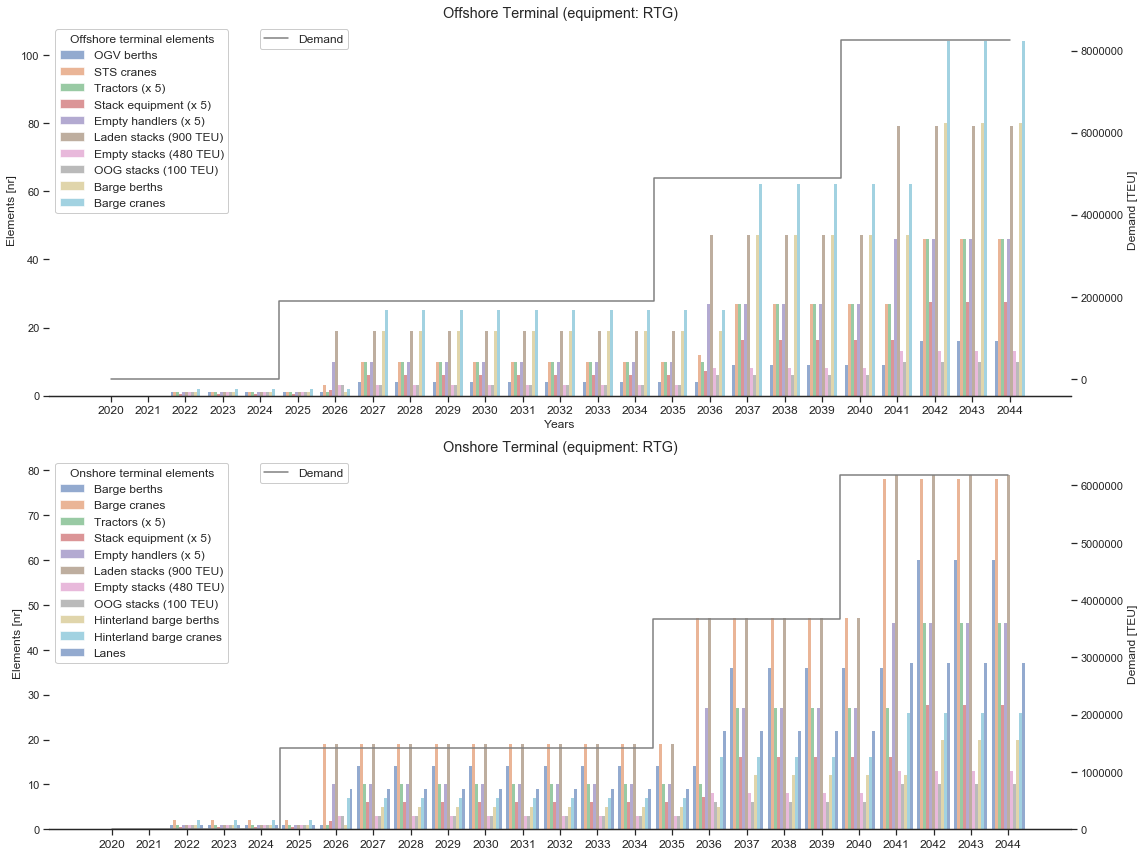

In [12]:
OffshoreBarge.terminal_elements_plot()
sns.despine(left=True)

plt.savefig("SaveFigures/Payra/terminal_elements.png", bbox_inches = 'tight')

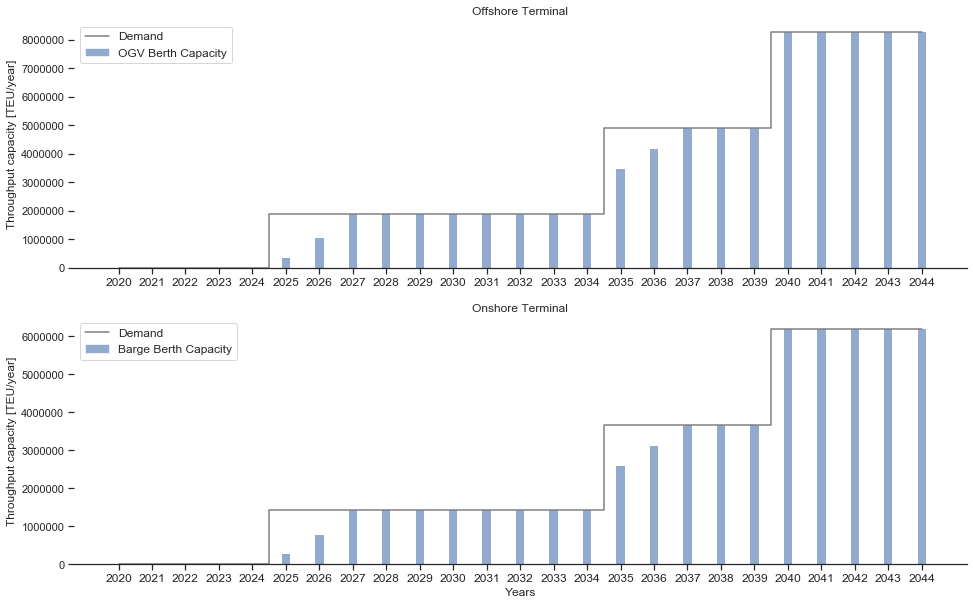

In [13]:
OffshoreBarge.terminal_capacity_plot()
sns.despine(left=True)

plt.savefig("SaveFigures/Payra/terminal_capacity.png")
  
# plt.step(years,scenario_demand)
# plt.step(years,scenario_demand_payra)

OGV apron (ha)  Laden stack (ha)  OOG stack (ha)  Empty stack (ha)  \
Year                                                                       
2020           0.000           0.00000           0.000           0.00000   
2021           0.000           0.00000           0.000           0.00000   
2022           3.300           0.66096           0.672           0.29376   
2023           3.300           0.66096           0.672           0.29376   
2024           3.300           0.66096           0.672           0.29376   
2025           3.300           0.66096           0.672           0.29376   
2026           3.300          12.55824           2.016           0.88128   
2027          14.010          12.55824           2.016           0.88128   
2028          14.010          12.55824           2.016           0.88128   
2029          14.010          12.55824           2.016           0.88128   
2030          14.010          12.55824           2.016           0.88128   
2031          14.010          12.55824           2.016           0.88128   
2032          14.010          12.55824           2.016           0.88128   
2033          14.010          12.55824           2.016           0.88128   
2034          14.010          12.55824           2.016           0.88128   
2035          14.010          12.55824           2.016           0.88128   
2036          14.010          31.06512           4.032           2.35008   
2037          31.335          31.06512           4.032           2.35008   
2038          31.335          31.06512           4.032           2.35008   
2039          31.335          31.06512           4.032           2.35008   
2040          31.335          31.06512           4.032           2.35008   
2041          31.335          52.21584           6.720           3.81888   
2042          55.590          52.21584           6.720           3.81888   
2043          55.590          52.21584           6.720           3.81888   
2044          55.590          52.21584           6.720           3.81888   

      General services (ha)  Barge area (ha)  Total storage (ha)  \
Year                                                               
2020                   0.00           0.0000             0.00000   
2021                   0.00           0.0000             0.00000   
2022                   0.76           0.6500             1.62672   
2023                   0.76           0.6500             1.62672   
2024                   0.76           0.6500             1.62672   
2025                   0.76           0.6500             1.62672   
2026                   0.76           0.6500            15.45552   
2027                   0.76          12.0925            15.45552   
2028                   0.76          12.0925            15.45552   
2029                   0.76          12.0925            15.45552   
2030                   0.76          12.0925            15.45552   
2031                   0.76          12.0925            15.45552   
2032                   0.76          12.0925            15.45552   
2033                   0.76          12.0925            15.45552   
2034                   0.76          12.0925            15.45552   
2035                   0.76          12.0925            15.45552   
2036                   0.76          12.0925            37.44720   
2037                   0.76          29.8025            37.44720   
2038                   0.76          29.8025            37.44720   
2039                   0.76          29.8025            37.44720   
2040                   0.76          29.8025            37.44720   
2041                   0.76          29.8025            62.75472   
2042                   0.76          50.6750            62.75472   
2043                   0.76          50.6750            62.75472   
2044                   0.76          50.6750            62.75472   

      Total land use (ha)  
Year                       
2020              0.00000  
2021              0.00000  
2022

Barge apron (ha)  Laden stack (ha)  OOG stack (ha)  Empty stack (ha)  \
Year                                                                         
2020             0.000           0.00000           0.000           0.00000   
2021             0.000           0.00000           0.000           0.00000   
2022             0.650           0.99144           1.008           0.44064   
2023             0.650           0.99144           1.008           0.44064   
2024             0.650           0.99144           1.008           0.44064   
2025             0.650           0.99144           1.008           0.44064   
2026             0.650          18.83736           3.024           1.32192   
2027             8.930          18.83736           3.024           1.32192   
2028             8.930          18.83736           3.024           1.32192   
2029             8.930          18.83736           3.024           1.32192   
2030             8.930          18.83736           3.024           1.32192   
2031             8.930          18.83736           3.024           1.32192   
2032             8.930          18.83736           3.024           1.32192   
2033             8.930          18.83736           3.024           1.32192   
2034             8.930          18.83736           3.024           1.32192   
2035             8.930          18.83736           3.024           1.32192   
2036             8.930          46.59768           6.048           3.52512   
2037            22.845          46.59768           6.048           3.52512   
2038            22.845          46.59768           6.048           3.52512   
2039            22.845          46.59768           6.048           3.52512   
2040            22.845          46.59768           6.048           3.52512   
2041            22.845          78.32376          10.080           5.72832   
2042            38.025          78.32376          10.080           5.72832   
2043            38.025          78.32376          10.080           5.72832   
2044            38.025          78.32376          10.080           5.72832   

      General services (ha)  Hinterland barge area (ha)  Gate area (ha)  \
Year                                                                      
2020                   0.00                      0.0000        0.000000   
2021                   0.00                      0.0000        0.000000   
2022                   0.88                      0.6500        0.028875   
2023                   0.88                      0.6500        0.028875   
2024                   0.88                      0.6500        0.028875   
2025                   0.88                      0.6500        0.028875   
2026                   0.88                      0.6500        0.259875   
2027                   0.88                      3.2375        0.259875   
2028                   0.88                      3.2375        0.259875   
2029                   0.88                      3.2375        0.259875   
2030                   0.88                      3.2375        0.259875   
2031                   0.88                      3.2375        0.259875   
2032                   0.88                      3.2375        0.259875   
2033                   0.88                      3.2375        0.259875   
2034                   0.88                      3.2375        0.259875   
2035                   0.88                      3.2375        0.259875   
2036                   0.88                      3.2375        0.635250   
2037                   0.88                      7.6650        0.635250   
2038                   0.88                      7.6650        0.635250   
2039                   0.88                      7.6650        0.635250   
2040                   0.88                      7.6650        0.635250   
2041                   0.88                      7.6650        1.068375   
2042                   0.88                     12.7250        1.068375   
2043                   0

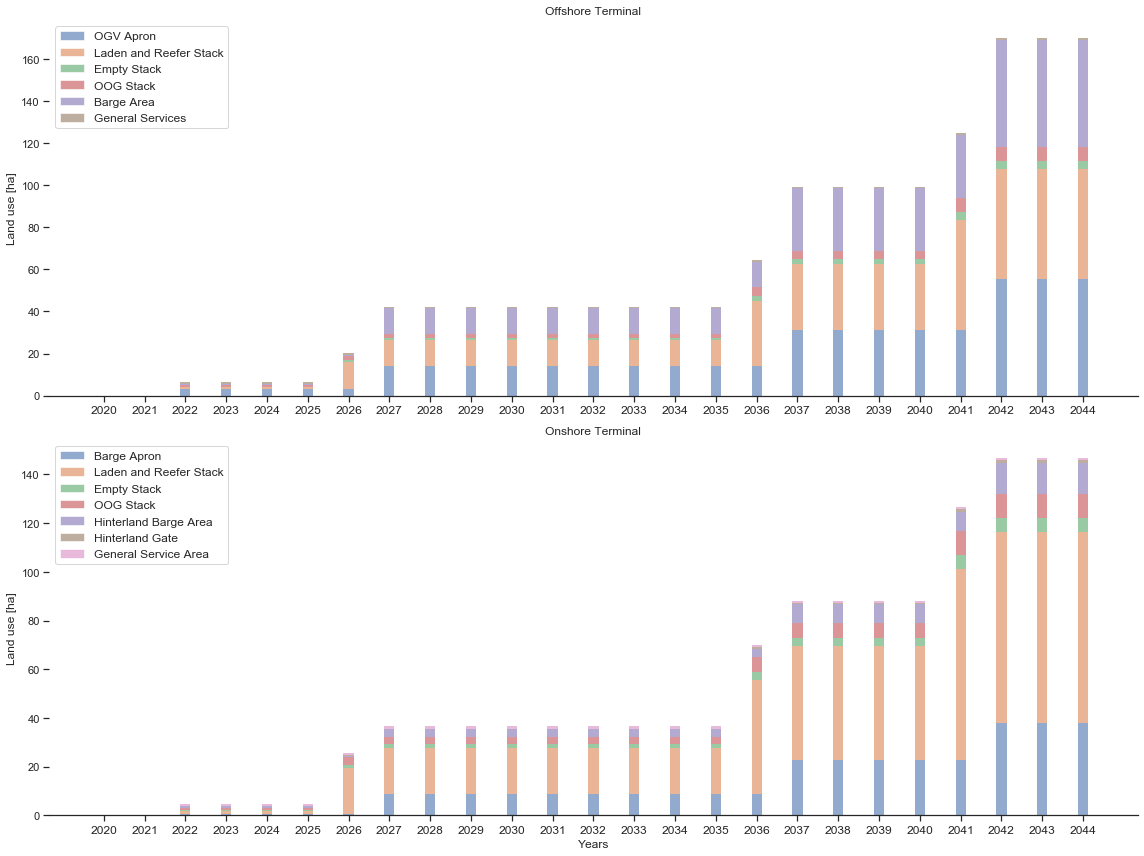

In [14]:
OffshoreBarge.terminal_land_use_plot(True)
sns.despine(left=True)

plt.savefig("SaveFigures/Payra/storage_area.png")

Laden storage (TEU)  Empty storage (TEU)  OOG storage (TEU)  \
Year                                                                
2020                    0                    0                  0   
2021                    0                    0                  0   
2022                  900                  480                100   
2023                  900                  480                100   
2024                  900                  480                100   
2025                  900                  480                100   
2026                17100                 1440                300   
2027                17100                 1440                300   
2028                17100                 1440                300   
2029                17100                 1440                300   
2030                17100                 1440                300   
2031                17100                 1440                300   
2032                17100                 1440                300   
2033                17100                 1440                300   
2034                17100                 1440                300   
2035                17100                 1440                300   
2036                42300                 3840                600   
2037                42300                 3840                600   
2038                42300                 3840                600   
2039                42300                 3840                600   
2040                42300                 3840                600   
2041                71100                 6240               1000   
2042                71100                 6240               1000   
2043                71100                 6240               1000   
2044                71100                 6240               1000   

      Total storage (TEU)  
Year                       
2020                    0  
2021                    0  
2022                 1480  
2023                 1480  
2024                 1480  
2025                 1480  
2026                18840  
2027                18840  
2028                18840  
2029                18840  
2030                18840  
2031                18840  
2032                18840  
2033                18840  
2034                18840  
2035                18840  
2036                46740  
2037                46740  
2038                46740  
2039                46740  
2040                46740  
2041                78340  
2042                78340  
2043                78340  
2044                78340

Laden storage (TEU)  Empty storage (TEU)  OOG storage (TEU)  \
Year                                                                
2020                  0.0                  0.0                0.0   
2021                  0.0                  0.0                0.0   
2022               1350.0                720.0              150.0   
2023               1350.0                720.0              150.0   
2024               1350.0                720.0              150.0   
2025               1350.0                720.0              150.0   
2026              25650.0               2160.0              450.0   
2027              25650.0               2160.0              450.0   
2028              25650.0               2160.0              450.0   
2029              25650.0               2160.0              450.0   
2030              25650.0               2160.0              450.0   
2031              25650.0               2160.0              450.0   
2032              25650.0               2160.0              450.0   
2033              25650.0               2160.0              450.0   
2034              25650.0               2160.0              450.0   
2035              25650.0               2160.0              450.0   
2036              63450.0               5760.0              900.0   
2037              63450.0               5760.0              900.0   
2038              63450.0               5760.0              900.0   
2039              63450.0               5760.0              900.0   
2040              63450.0               5760.0              900.0   
2041             106650.0               9360.0             1500.0   
2042             106650.0               9360.0             1500.0   
2043             106650.0               9360.0             1500.0   
2044             106650.0               9360.0             1500.0   

      Total storage (TEU)  
Year                       
2020                  0.0  
2021                  0.0  
2022               2220.0  
2023               2220.0  
2024               2220.0  
2025               2220.0  
2026              28260.0  
2027              28260.0  
2028              28260.0  
2029              28260.0  
2030              28260.0  
2031              28260.0  
2032              28260.0  
2033              28260.0  
2034              28260.0  
2035              28260.0  
2036              70110.0  
2037              70110.0  
2038              70110.0  
2039              70110.0  
2040              70110.0  
2041             117510.0  
2042             117510.0  
2043             117510.0  
2044             117510.0

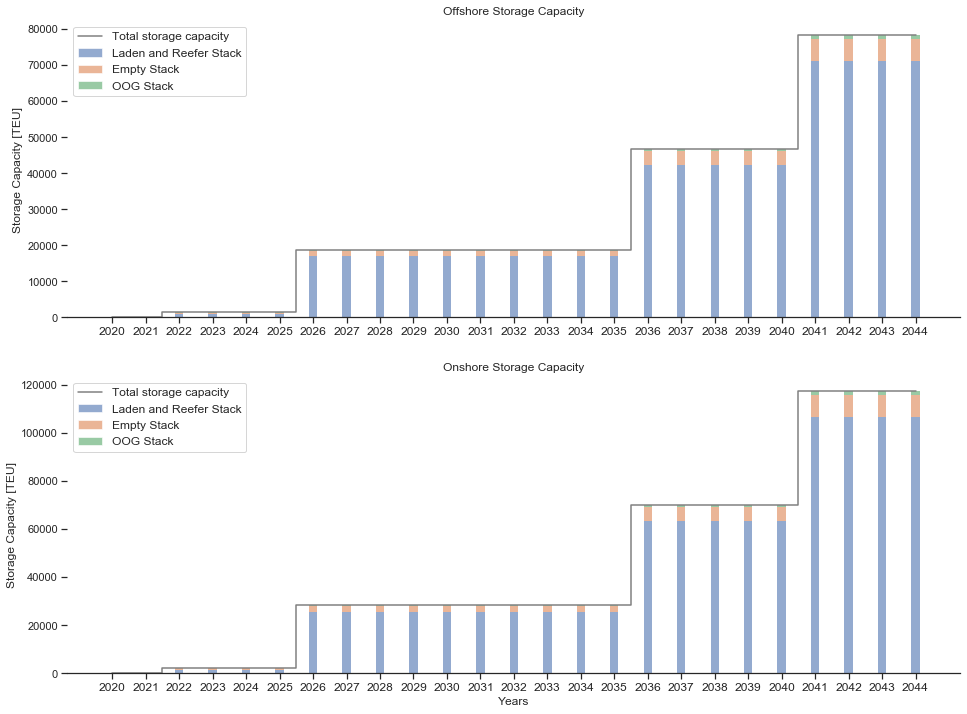

In [15]:
OffshoreBarge.storage_capacity_plot(True)
sns.despine(left=True)

plt.savefig("SaveFigures/Payra/storage_capacity.png")

In [16]:
hide_columns_list = ['Demurrage']
hide_columns_list = ['Offshore Maintenance', 'Offshore Insurance', 'Offshore Energy', 
                     'Offshore Labour', 'Offshore Fuel', 'Demurrage',
                     'Onshore Maintenance', 'Onshore Insurance', 'Onshore Energy', 
                     'Onshore Labour', 'Onshore Fuel', 'Demurrage']
cash_flows_WACC_real_df.style.hide_columns(hide_columns_list).hide_index()

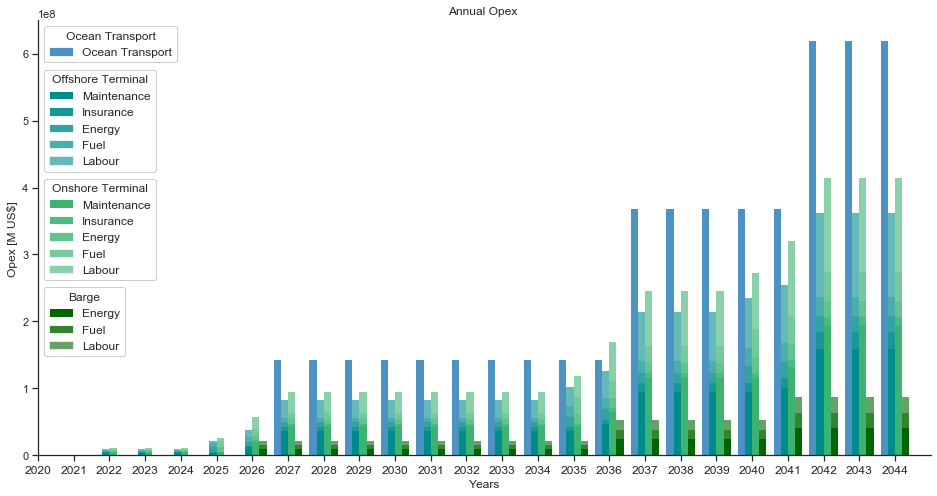

In [17]:
OffshoreBarge.terminal_opex_plot(cash_flows_df, False)
sns.despine(top=True)

plt.savefig("SaveFigures/Payra/opex.png")

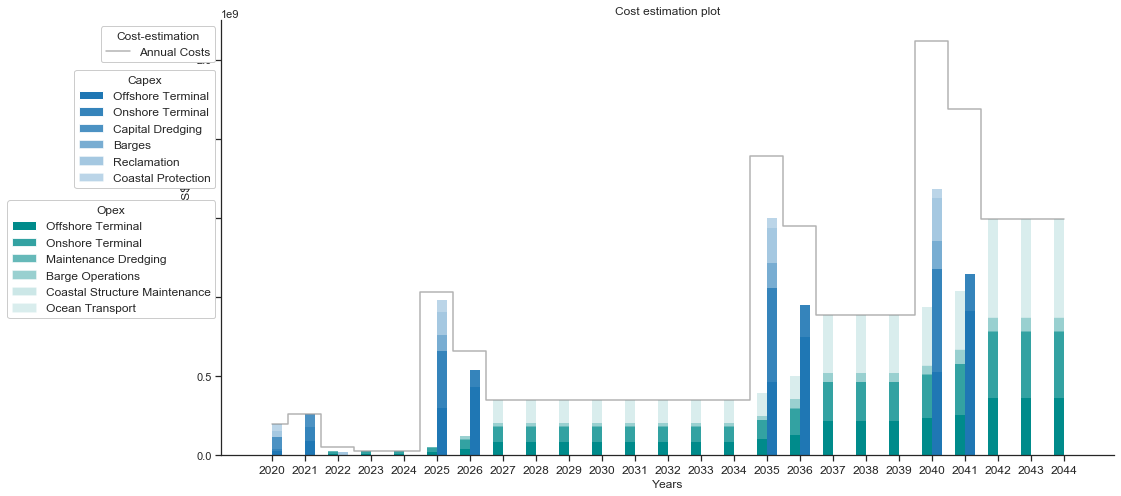

In [18]:
OffshoreBarge.cashflow_plot(cash_flows_df)
sns.despine(top=True)

plt.savefig("SaveFigures/Payra/cash_flow_plot.png", bbox_inches = 'tight')

 ** PV of the costs: $8,228,000,000.0


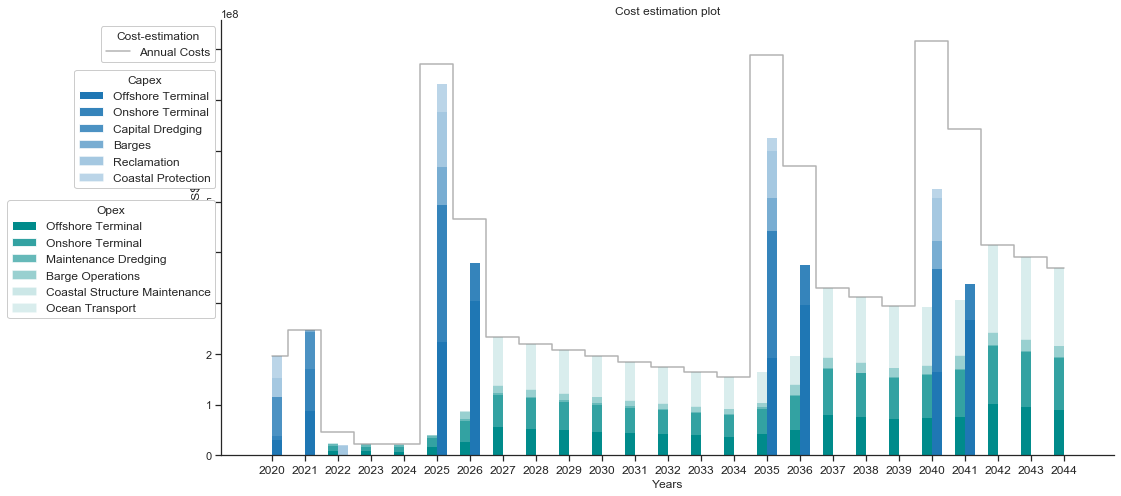

In [19]:
scroll_to_current_cell(preserve=True)

print(' ** PV of the costs: ${}'.format(f'{round(PV,-6):,}'))

OffshoreBarge.cashflow_plot(cash_flows_WACC_real_df)
sns.despine(top=True)

plt.savefig("SaveFigures/Payra/cash_flow_plot_real.png", bbox_inches = 'tight')

In [20]:
print("Offshore terminal capacity for initial demand:")
total_offshore_ground_slots, total_offshore_stack_capacity, total_offshore_stack_online = OffshoreBarge.total_stack_capacity(2023)

total_offshore_ground_slots = round(total_offshore_ground_slots,-1)
total_offshore_stack_capacity = round(total_offshore_stack_capacity,-1)
      
%store total_offshore_stack_capacity

Offshore terminal capacity for initial demand:
     Total Ground Slots required   (@ start of year):  0
     Total Stack capacity required (@ start of year):  0 TEU
     Total Stack capacity online   (@ start of year):  1,500 TEU

Stored 'total_offshore_stack_capacity' (int)


Element         Costs
0       Reclamation  3.447056e+08
1    Offshore Capex  1.564018e+09
2     Offshore Opex  1.180506e+09
3     Onshore Capex  1.036545e+09
4      Onshore Opex  1.382266e+09
5  Capital Dredging  1.474749e+08
6    Main. Dredging  6.341732e+07
7  Barge Investment  1.984704e+08
8  Barge Operations  3.048180e+08
9   Ocean Transport  1.835267e+09

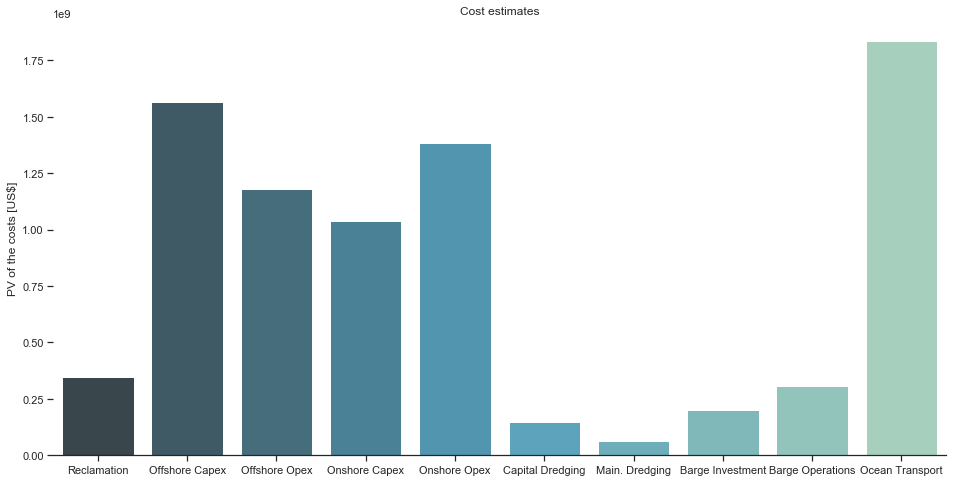

In [21]:
OffshoreBarge.element_cashflow_plot(fig_x = 16, fig_y = 8)
sns.despine(left=True)